# Capstone Project


# Buy Homes/Properties - REAL-ESTATE


# make predictions:-
1. Buy  Total  Price
2. Carpet Area
3. Property Type

# Phase No. - 3
# Importing All Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')

# Loading Dataset

In [2]:
df1 = pd.read_csv('Table_1.csv')
df2 = pd.read_csv('Table_2.csv')
df3 = pd.read_csv('Table_3.csv')

# Combine all Dataset

In [3]:
# Assuming df1 ,df2 and df3 are our three datasets
#Concatenate along rows
data = pd.concat([df1,df2,df3], axis = 1)
data

,Sr_No,BHK_Type,Property_Type,Number_Of_Beds,Number_of_Bathroom,Number_Of_Balcony,Address,City,State_Code,Country,...,Transaction_Type,Year_Of_Built,Price_Per_Sqaure_Feet,Sr_No,Furnished_Status,Facing,Car_Parking,Type_Of_Ownership,Booking_Amount,Buy_Total_Price
0,1,4,Condo,4,4,4,"305 South Racine Avenue #PHD, Chicago, IL 60607",Chicago,NaN,USA,...,NaN,NaN,NaN,1,NaN,NaN,NaN,BUILDER,4155834,207791688
1,2,4,Condo,4,4,4,"305 South Racine Avenue #PHD, Chicago, IL 60607",Chicago,NaN,USA,...,NaN,NaN,NaN,2,NaN,NaN,NaN,BUILDER,4031320,201566000
2,3,2,Condo,2,2,2,"630 North Franklin Street #803, Chicago, IL 60654",Chicago,NaN,USA,...,NaN,NaN,NaN,3,NaN,NaN,NaN,BUILDER,789640,39482000
3,4,3,Condo,3,3,3,"340 East Randolph Street #1705, Chicago, IL 60601",Chicago,NaN,USA,...,NaN,2007,NaN,4,NaN,NaN,NaN,BUILDER,3316488,165824400
4,5,3,Condo,3,3,3,"1211 South Prairie Avenue #706, Chicago, IL 60605",Chicago,NaN,USA,...,NaN,NaN,NaN,5,NaN,NaN,NaN,BUILDER,2078000,103900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,3222,2,Builder Floors,2,2,2,"Ramesh Nagar, Delhi, Delhi",Delhi,NaN,INDIA,...,NaN,NaN,NaN,3222,SemiFurnished,NorthEast,1,AGENT,220000,11000000
3185,3223,3,Builder Floors,3,2,3,"Vikaspuri, Delhi, Delhi",Delhi,NaN,INDIA,...,NaN,NaN,NaN,3223,SemiFurnished,NaN,NaN,BUILDER,86000,4300000
3186,3224,2,Builder Floors,2,2,2,"Ramesh Nagar, Delhi, Delhi",Delhi,NaN,INDIA,...,NaN,NaN,NaN,3224,SemiFurnished,NorthEast,1,AGENT,220000,11000000
3187,3225,4,Houses & Villas,4,3,4,"Raghubir Nagar, Delhi, Delhi",Delhi,NaN,INDIA,...,NaN,NaN,NaN,3225,Unfurnished,NaN,NaN,OWNER,96000,4800000


In [4]:
data.head()

,Sr_No,BHK_Type,Property_Type,Number_Of_Beds,Number_of_Bathroom,Number_Of_Balcony,Address,City,State_Code,Country,...,Transaction_Type,Year_Of_Built,Price_Per_Sqaure_Feet,Sr_No,Furnished_Status,Facing,Car_Parking,Type_Of_Ownership,Booking_Amount,Buy_Total_Price
0,1,4,Condo,4,4,4,"305 South Racine Avenue #PHD, Chicago, IL 60607",Chicago,NaN,USA,...,NaN,NaN,NaN,1,NaN,NaN,NaN,BUILDER,4155834,207791688
1,2,4,Condo,4,4,4,"305 South Racine Avenue #PHD, Chicago, IL 60607",Chicago,NaN,USA,...,NaN,NaN,NaN,2,NaN,NaN,NaN,BUILDER,4031320,201566000
2,3,2,Condo,2,2,2,"630 North Franklin Street #803, Chicago, IL 60654",Chicago,NaN,USA,...,NaN,NaN,NaN,3,NaN,NaN,NaN,BUILDER,789640,39482000
3,4,3,Condo,3,3,3,"340 East Randolph Street #1705, Chicago, IL 60601",Chicago,NaN,USA,...,NaN,2007,NaN,4,NaN,NaN,NaN,BUILDER,3316488,165824400
4,5,3,Condo,3,3,3,"1211 South Prairie Avenue #706, Chicago, IL 60605",Chicago,NaN,USA,...,NaN,NaN,NaN,5,NaN,NaN,NaN,BUILDER,2078000,103900000


In [5]:
print('Number of Columns:', data.shape[1])
print('Number of Rows:', data.shape[0])

Number of Columns: 25
Number of Rows: 3189


In [6]:
# Checking and removing if there is any Duplicate entry present in our dataset
data.drop_duplicates(inplace = True)
print('Number of Columns:', data.shape[1])
print('Number of Rows:', data.shape[0])

Number of Columns: 25
Number of Rows: 3189


No duplicate record found in dataset

In [7]:
data.columns

Index(['Sr_No', 'BHK_Type', 'Property_Type', 'Number_Of_Beds',
       'Number_of_Bathroom', 'Number_Of_Balcony', 'Address', 'City',
       'State_Code', 'Country', 'Landmark', 'Sr_No', 'Carpet_Area', 'Status',
       'Floor', 'Transaction_Type', 'Year_Of_Built', 'Price_Per_Sqaure_Feet',
       'Sr_No', 'Furnished_Status', 'Facing', 'Car_Parking',
       'Type_Of_Ownership', 'Booking_Amount', 'Buy_Total_Price'],
      dtype='object')

I have checked columns name and i found that Sr_No. column occuring 3 times. so we dont need it that's why droping the column.  

In [8]:
# remove Sr_No columns
data.drop(['Sr_No'], inplace = True, axis = 1)

In [9]:
data.columns

Index(['BHK_Type', 'Property_Type', 'Number_Of_Beds', 'Number_of_Bathroom',
       'Number_Of_Balcony', 'Address', 'City', 'State_Code', 'Country',
       'Landmark', 'Carpet_Area', 'Status', 'Floor', 'Transaction_Type',
       'Year_Of_Built', 'Price_Per_Sqaure_Feet', 'Furnished_Status', 'Facing',
       'Car_Parking', 'Type_Of_Ownership', 'Booking_Amount',
       'Buy_Total_Price'],
      dtype='object')

here i have checked that Sr_No column are compeletly dropped.

In [10]:
data.dtypes

BHK_Type                   int64
Property_Type             object
Number_Of_Beds             int64
Number_of_Bathroom         int64
Number_Of_Balcony          int64
Address                   object
City                      object
State_Code               float64
Country                   object
Landmark                 float64
Carpet_Area               object
Status                    object
Floor                    float64
Transaction_Type         float64
Year_Of_Built             object
Price_Per_Sqaure_Feet     object
Furnished_Status          object
Facing                    object
Car_Parking               object
Type_Of_Ownership         object
Booking_Amount             int64
Buy_Total_Price            int64
dtype: object

# Data Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BHK_Type               3189 non-null   int64  
 1   Property_Type          3189 non-null   object 
 2   Number_Of_Beds         3189 non-null   int64  
 3   Number_of_Bathroom     3189 non-null   int64  
 4   Number_Of_Balcony      3189 non-null   int64  
 5   Address                3189 non-null   object 
 6   City                   3189 non-null   object 
 7   State_Code             0 non-null      float64
 8   Country                3189 non-null   object 
 9   Landmark               0 non-null      float64
 10  Carpet_Area            3092 non-null   object 
 11  Status                 3189 non-null   object 
 12  Floor                  1030 non-null   float64
 13  Transaction_Type       0 non-null      float64
 14  Year_Of_Built          1709 non-null   object 
 15  Pric

from data information we can see that Data having 3189 entries and 22 columns out of 27, 12 columns are Object, 6 is int and 4 is Float data type data having missing values also in many columns. for exact count lets check the null values present in data. 

In [12]:
data.isnull().sum()

BHK_Type                    0
Property_Type               0
Number_Of_Beds              0
Number_of_Bathroom          0
Number_Of_Balcony           0
Address                     0
City                        0
State_Code               3189
Country                     0
Landmark                 3189
Carpet_Area                97
Status                      0
Floor                    2159
Transaction_Type         3189
Year_Of_Built            1480
Price_Per_Sqaure_Feet    1347
Furnished_Status         1918
Facing                   2325
Car_Parking              2069
Type_Of_Ownership           0
Booking_Amount              0
Buy_Total_Price             0
dtype: int64

Here we can see most of the data columns are having missing values in some columns we have complete missing data one of the important column having missing values so we need to drop  or fill the columns.

# Drop all the columns which are not relevent

State_Code, Landmark, Floor, Transaction_Type, Year_Of_Built, Price_Per_Sqaure_Feet, Furnished_Status, Facing, Car_Parking having so many 'NAN' values instead of filing we will drop them.

In [13]:
data.drop(['State_Code', 'Landmark', 'Floor', 'Transaction_Type', 'Year_Of_Built', 'Price_Per_Sqaure_Feet', 'Furnished_Status', 'Facing', 'Car_Parking'], inplace = True, axis = 1)

In [14]:
data.isnull().sum()

BHK_Type               0
Property_Type          0
Number_Of_Beds         0
Number_of_Bathroom     0
Number_Of_Balcony      0
Address                0
City                   0
Country                0
Carpet_Area           97
Status                 0
Type_Of_Ownership      0
Booking_Amount         0
Buy_Total_Price        0
dtype: int64

# Fill Null Values

In [15]:
data['Carpet_Area']= pd.to_numeric(data['Carpet_Area'], errors = 'coerce')

In [16]:
data['Carpet_Area'].fillna(value = data['Carpet_Area'].mean(), inplace = True)

In [17]:
data.isnull().sum()

BHK_Type              0
Property_Type         0
Number_Of_Beds        0
Number_of_Bathroom    0
Number_Of_Balcony     0
Address               0
City                  0
Country               0
Carpet_Area           0
Status                0
Type_Of_Ownership     0
Booking_Amount        0
Buy_Total_Price       0
dtype: int64

Here we see that data has no null values.

# Exploratory Data Analysis

# Univariate Analysis

Let's plot the distribution and counts for target and feature columns.

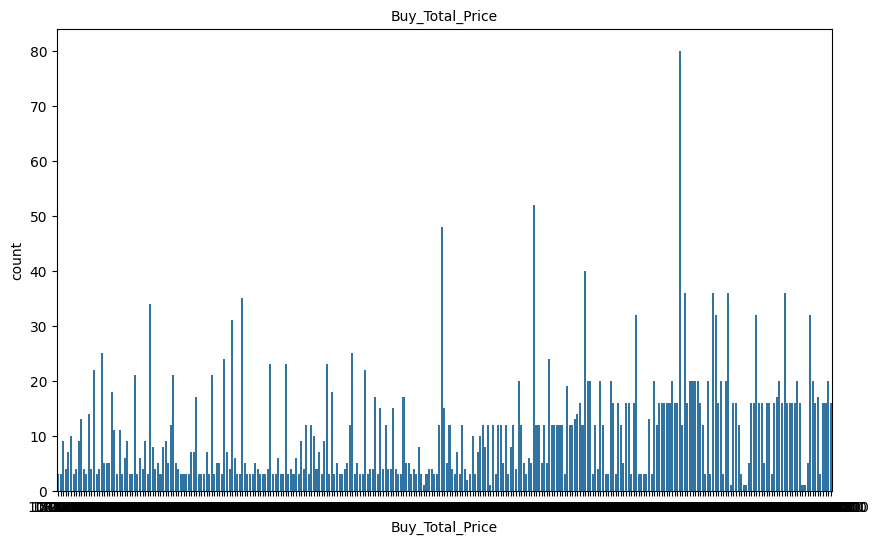

Buy_Total_Price
66412880     80
33164880     52
19950000     48
43638000     40
174552000    36
             ..
124680000     1
27845200      1
115952400     1
103900000     1
207791688     1
Name: count, Length: 303, dtype: int64

In [18]:
plt.figure(figsize = (10,6))
sns.countplot(data= data,x='Buy_Total_Price')
plt.xlabel('Buy_Total_Price', fontsize=10)
plt.title('Buy_Total_Price', fontsize = 10)
plt.show()
data['Buy_Total_Price'].value_counts()

Observations:- the properties having prices of 66.4L, 33.1L, 19.9L, 43.6L, 1.74cr, having maximum no.of demand. Rest properties showing less amount of demand for rest of the price range.

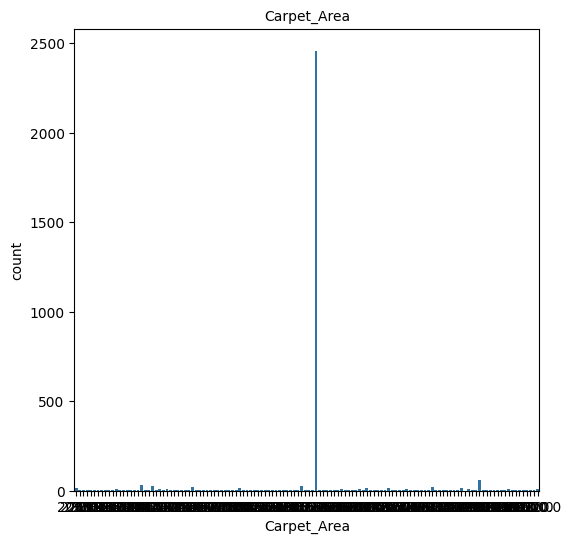

Carpet_Area
622.480822    2459
900.000000      59
400.000000      31
410.000000      29
600.000000      28
              ... 
331.000000       3
687.000000       3
688.000000       2
488.000000       2
864.000000       1
Name: count, Length: 128, dtype: int64

In [19]:
plt.figure(figsize = (6,6))
sns.countplot(data=data, x='Carpet_Area')
plt.title('Carpet_Area', fontsize = 10)
plt.xlabel('Carpet_Area', fontsize = 10)
plt.show()
data['Carpet_Area'].value_counts()

Observations:- the properties having Carpet_area of 622.48 SQFt, having maximum no.of demand. Rest properties showing less amount of demand for rest of the carpet Area.

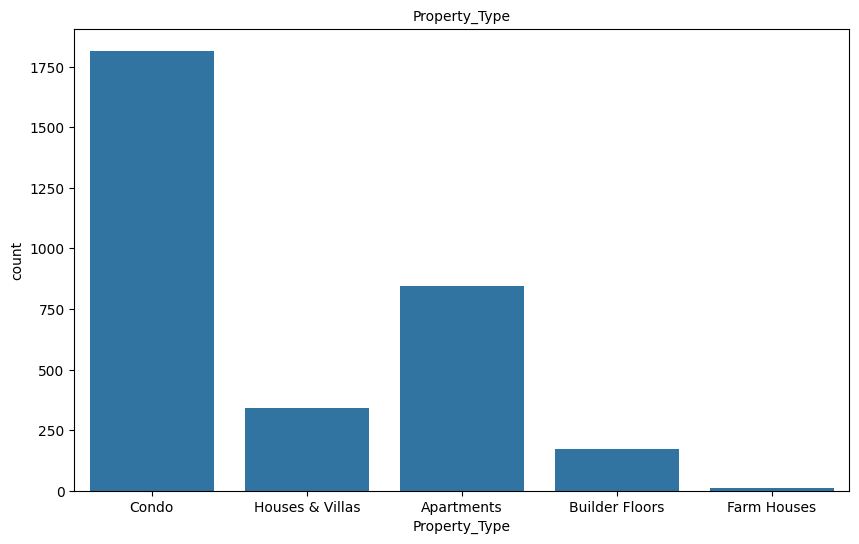

Property_Type
Condo              1816
Apartments          846
Houses & Villas     340
Builder Floors      174
Farm Houses          13
Name: count, dtype: int64

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(data= data,x='Property_Type')
plt.xlabel('Property_Type', fontsize=10)
plt.title('Property_Type', fontsize = 10)
plt.show()
data['Property_Type'].value_counts()

Observations:- The Condo Property Type having more demand and following the rest.

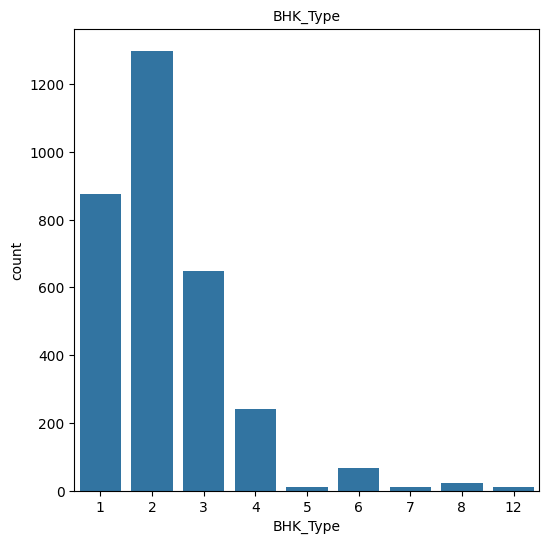

BHK_Type
2     1299
1      876
3      648
4      240
6       66
8       24
12      12
7       12
5       12
Name: count, dtype: int64

In [21]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='BHK_Type')
plt.title('BHK_Type', fontsize = 10)
plt.xlabel('BHK_Type', fontsize = 10)
plt.show()
data['BHK_Type'].value_counts()

Observations:- The 2BHK Property having more demand and following the rest.

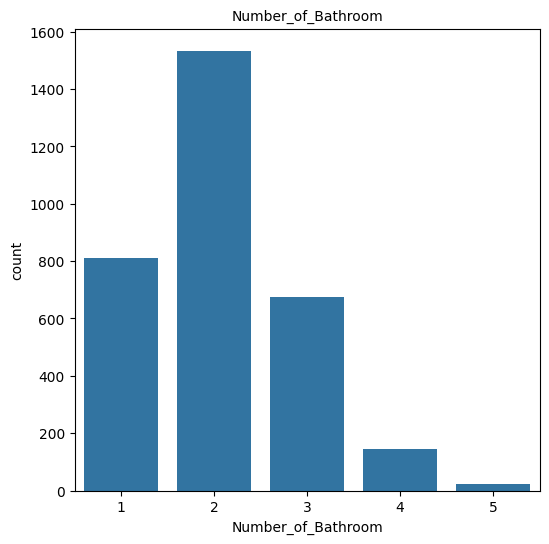

Number_of_Bathroom
2    1534
1     811
3     674
4     146
5      24
Name: count, dtype: int64

In [22]:
plt.figure(figsize = (6,6))
sns.countplot(data=data, x='Number_of_Bathroom')
plt.title('Number_of_Bathroom', fontsize = 10)
plt.xlabel('Number_of_Bathroom', fontsize = 10)
plt.show()
data['Number_of_Bathroom'].value_counts()

Observations:- The 2 Number Of Bathroom Properties having more demand and following the rest.

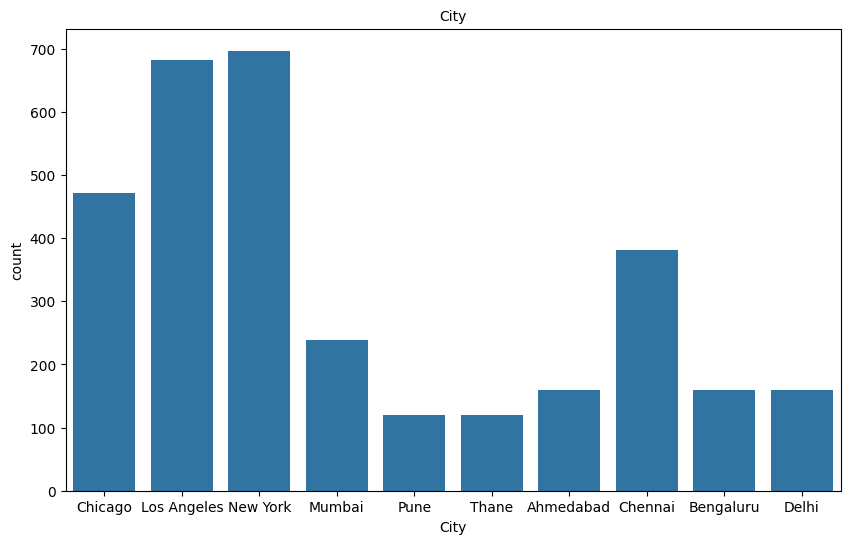

City
New York       697
Los Angeles    683
Chicago        472
Chennai        381
Mumbai         238
Delhi          160
Ahmedabad      159
Bengaluru      159
Pune           120
Thane          120
Name: count, dtype: int64

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(data= data,x='City')
plt.xlabel('City', fontsize=10)
plt.title('City', fontsize = 10)
plt.show()
data['City'].value_counts()

Observations:- The data showing Number of property demand for respective cities.

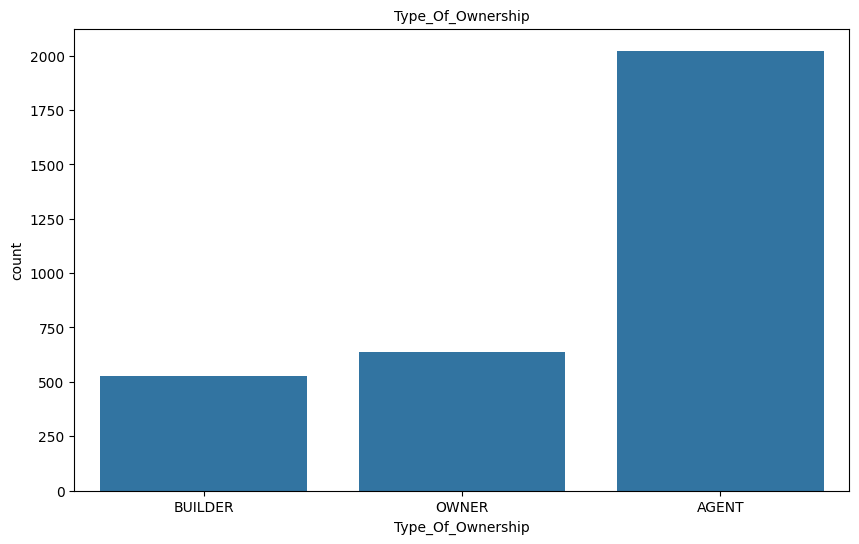

Type_Of_Ownership
AGENT      2023
OWNER       638
BUILDER     528
Name: count, dtype: int64

In [24]:
plt.figure(figsize = (10,6))
sns.countplot(data= data,x='Type_Of_Ownership')
plt.xlabel('Type_Of_Ownership', fontsize=10)
plt.title('Type_Of_Ownership', fontsize = 10)
plt.show()
data['Type_Of_Ownership'].value_counts()

Observations:- Data is showing type of ownership as agent is mostly prefered as per the datacount.

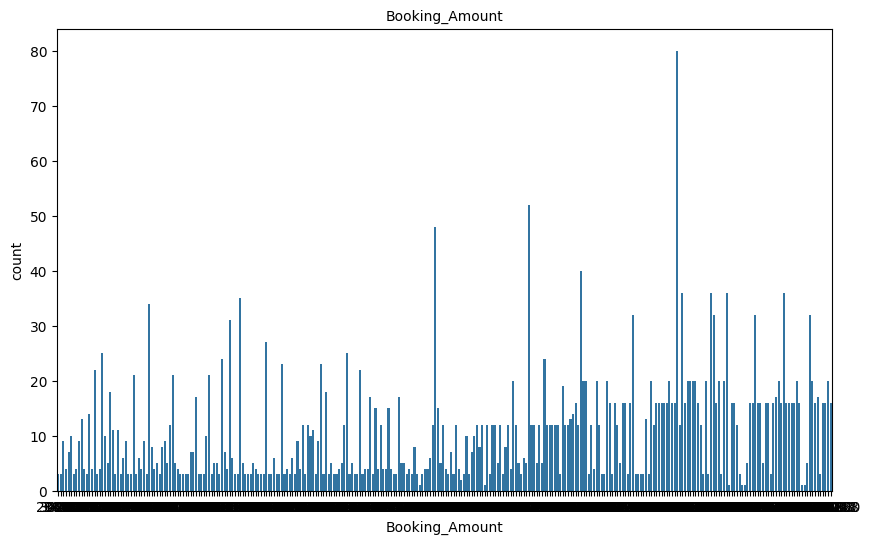

Booking_Amount
1328258    80
663298     52
399000     48
872760     40
1986568    36
           ..
2493600     1
556904      1
2319048     1
2078000     1
4155834     1
Name: count, Length: 298, dtype: int64

In [25]:
plt.figure(figsize = (10,6))
sns.countplot(data= data,x='Booking_Amount')
plt.xlabel('Booking_Amount', fontsize=10)
plt.title('Booking_Amount', fontsize = 10)
plt.show()
data['Booking_Amount'].value_counts()

Observations:- data showing Booking Amount is also related to Buy total price.

# Bivariate Analysis

In bivariate analysis we will analysis the feature columns agains target column.

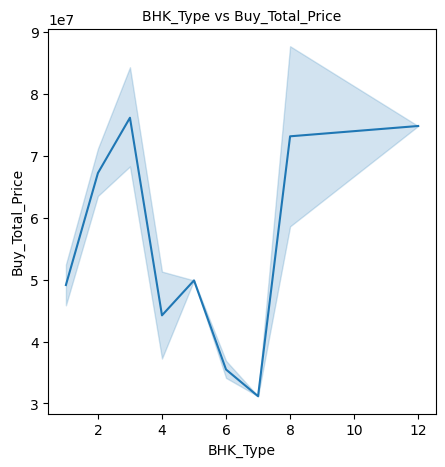

In [26]:
plt.figure(figsize = (5,5))
sns.lineplot (data = data,x='BHK_Type', y='Buy_Total_Price')
locs, labels = plt.xticks()
plt.title('BHK_Type vs Buy_Total_Price', fontsize=10)
plt.show()

Observation:- BHK_Type is affecting the Buy_Total_Price.

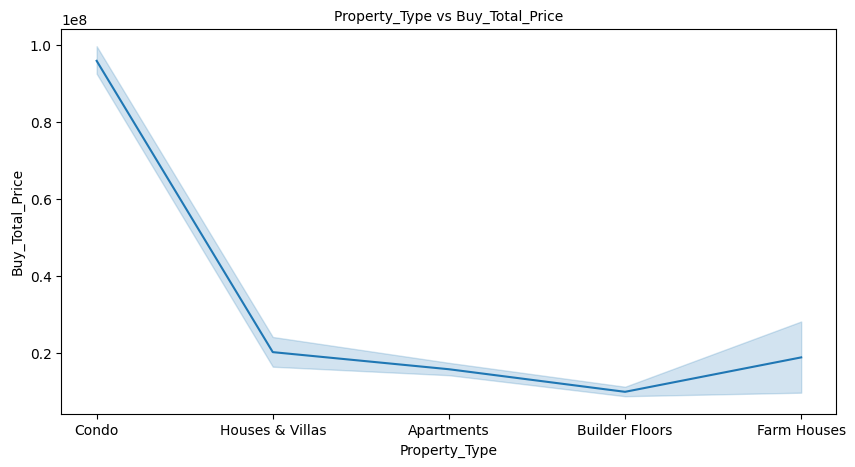

In [27]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Property_Type', y='Buy_Total_Price')
locs, labels = plt.xticks()
plt.title('Property_Type vs Buy_Total_Price', fontsize=10)
plt.show()

Obeservation:- Property_type is affecting Buy_Total_Price. at high Buy_Total_Price Condo properties is prefered in high demand.

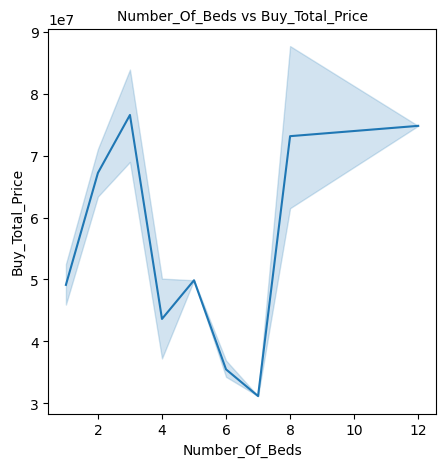

In [28]:
plt.figure(figsize = (5,5))
sns.lineplot (data = data,x='Number_Of_Beds', y='Buy_Total_Price')
locs, labels = plt.xticks()
plt.title('Number_Of_Beds vs Buy_Total_Price', fontsize=10)
plt.show()

Obeservation:- same as BHK_Type. relation between Buy_Total_Price.

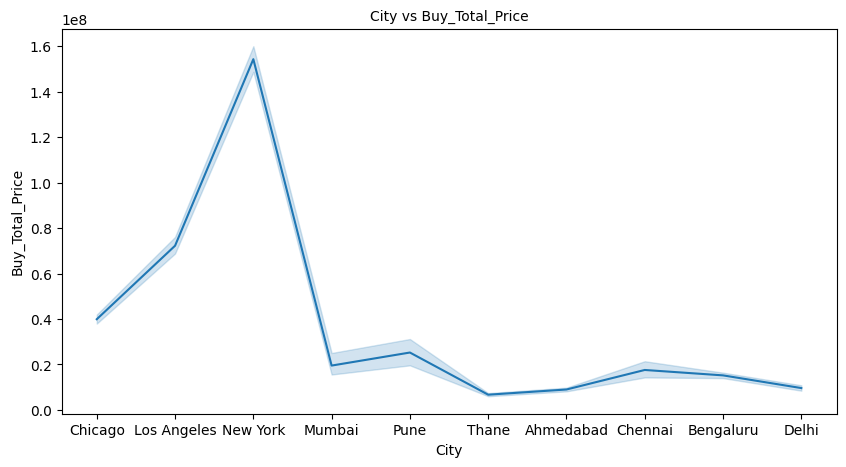

In [29]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='City', y='Buy_Total_Price')
locs, labels = plt.xticks()
plt.title('City vs Buy_Total_Price', fontsize=10)
plt.show()

Obeservation:- City is affecting Buy_Total_Price. at high Buy_Total_Price NewYork City is prefered in high demand.

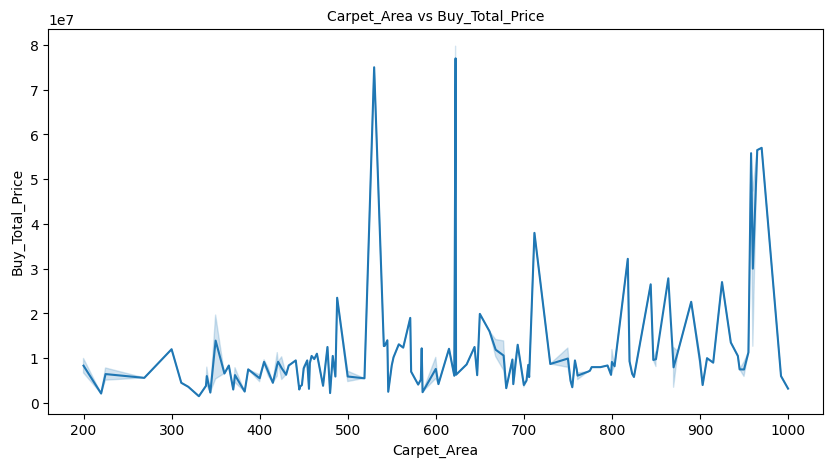

In [30]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Carpet_Area', y='Buy_Total_Price')
locs, labels = plt.xticks()
plt.title('Carpet_Area vs Buy_Total_Price', fontsize=10)
plt.show()

Observation:- Carpet_Area and Buy_Total_Price is highly affecting to each other.

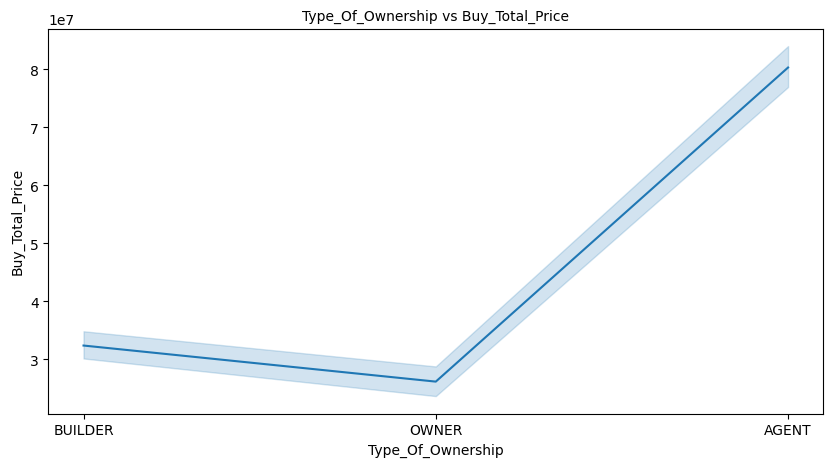

In [31]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Type_Of_Ownership', y='Buy_Total_Price')
locs, labels = plt.xticks()
plt.title('Type_Of_Ownership vs Buy_Total_Price', fontsize=10)
plt.show()

Obeservation:- Type_Of_Ownership is affecting Buy_Total_Price. at high Buy_Total_Price agent is prefered in high demand.

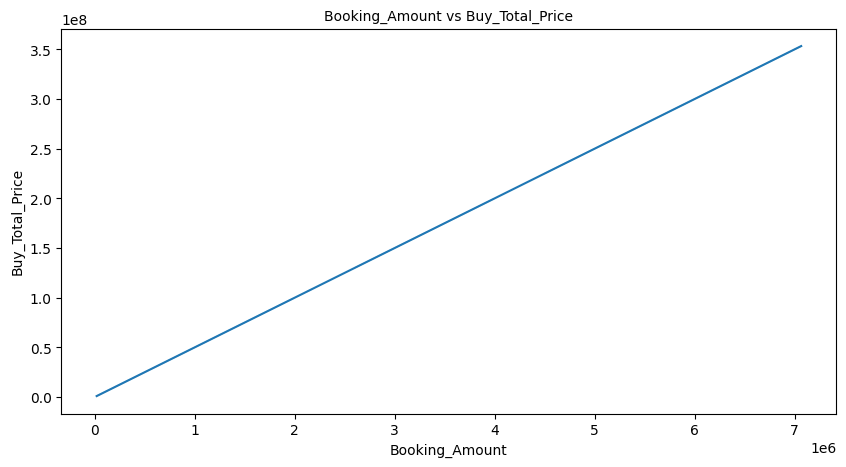

In [32]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Booking_Amount', y='Buy_Total_Price')
locs, labels = plt.xticks()
plt.title('Booking_Amount vs Buy_Total_Price', fontsize=10)
plt.show()

Observation:- we can see that Booking Amount is Directly Proportional to Buy_Total_Price.

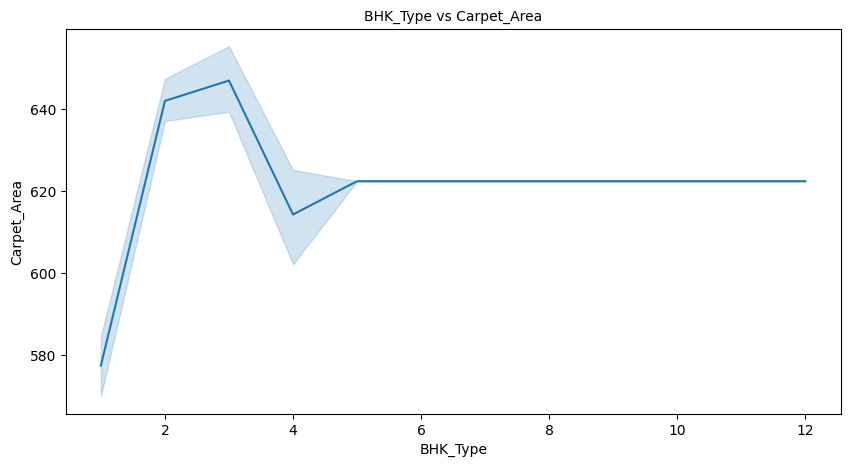

In [33]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='BHK_Type', y='Carpet_Area')
locs, labels = plt.xticks()
plt.title('BHK_Type vs Carpet_Area', fontsize=10)
plt.show()

Observation:- BHK_Type is affecting the Carpet_Area.

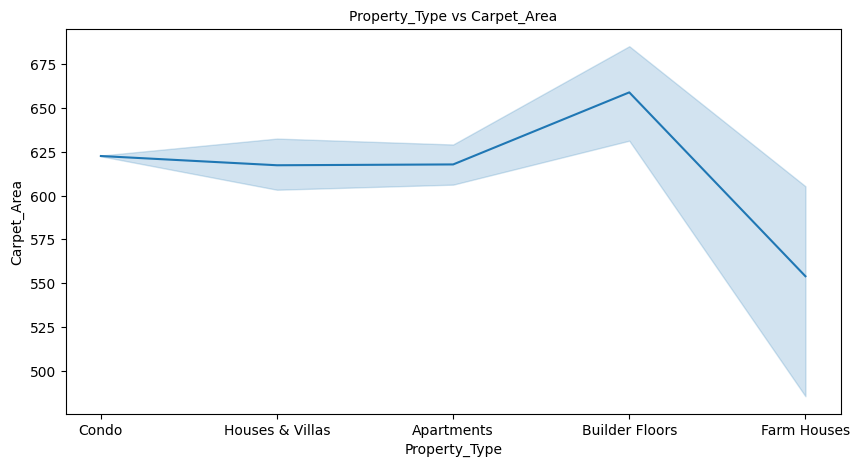

In [34]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Property_Type', y='Carpet_Area')
locs, labels = plt.xticks()
plt.title('Property_Type vs Carpet_Area', fontsize=10)
plt.show()

Obeservation:- Property_type is affecting Carpet_Area. at Carpet_Area Builder Floors properties is prefered in high demand.

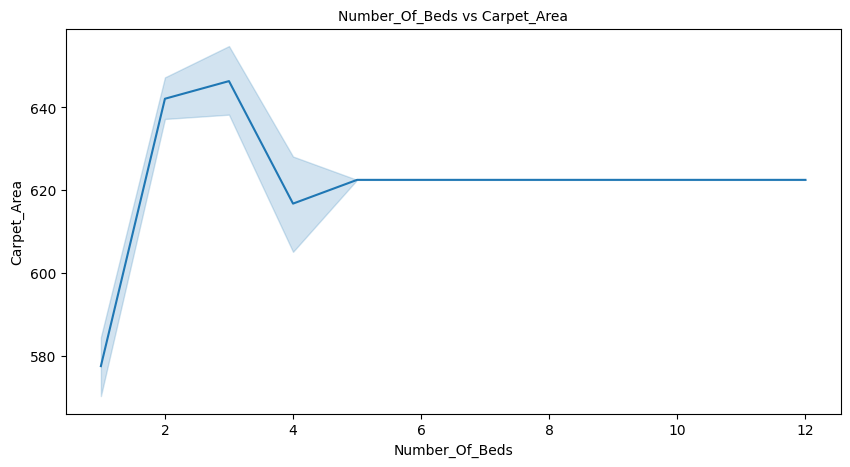

In [35]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Number_Of_Beds', y='Carpet_Area')
locs, labels = plt.xticks()
plt.title('Number_Of_Beds vs Carpet_Area', fontsize=10)
plt.show()

Obeservation:- same as BHK_Type. relation between Carpet_Area.

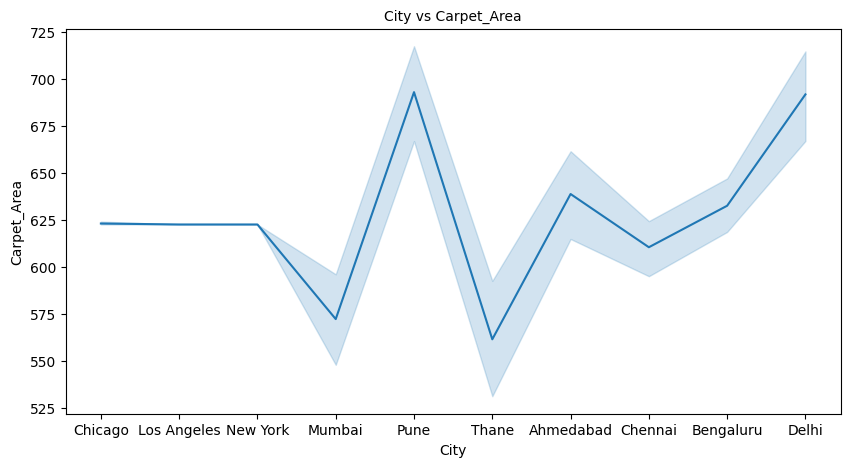

In [36]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='City', y='Carpet_Area')
locs, labels = plt.xticks()
plt.title('City vs Carpet_Area', fontsize=10)
plt.show()

Obeservation:- City is affecting Carpet_Area. at high Carpet_Area Pune and Delhi City is prefered in high demand.

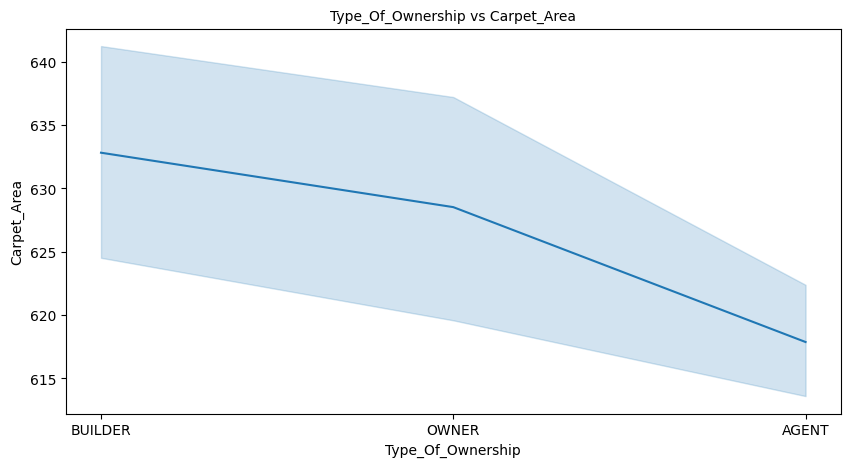

In [37]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Type_Of_Ownership', y='Carpet_Area')
locs, labels = plt.xticks()
plt.title('Type_Of_Ownership vs Carpet_Area', fontsize=10)
plt.show()

Obeservation:- Type_Of_Ownership is affecting Carpet_Area. at high Carpet_Area Builder prefered in high demand.

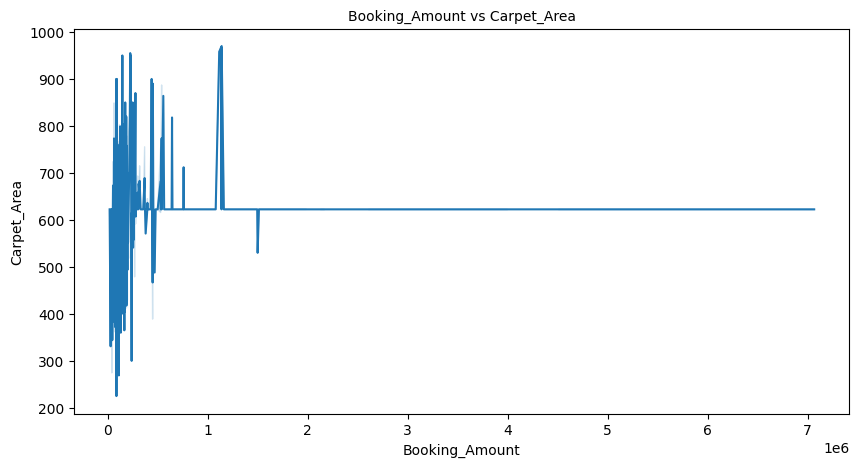

In [38]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Booking_Amount', y='Carpet_Area')
locs, labels = plt.xticks()
plt.title('Booking_Amount vs Carpet_Area', fontsize=10)
plt.show()

Observation:- Carpet_Area and Booking_Amount is highly affecting to each other.

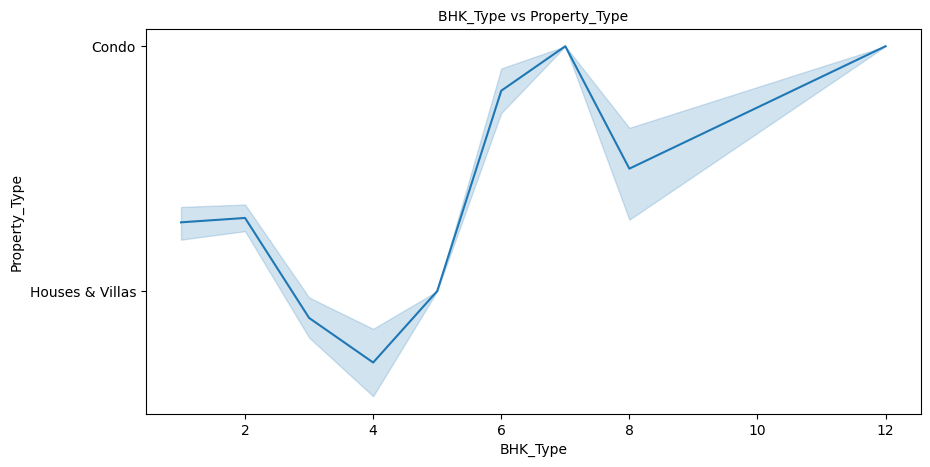

In [39]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='BHK_Type', y='Property_Type')
locs, labels = plt.xticks()
plt.title('BHK_Type vs Property_Type', fontsize=10)
plt.show()

Observation:- BHK_Type and Property_Type is highly affecting to each other.

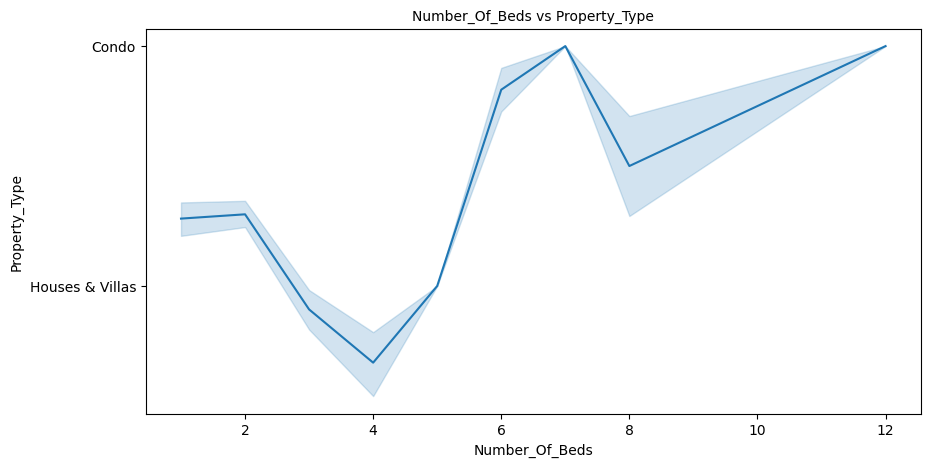

In [40]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Number_Of_Beds', y='Property_Type')
locs, labels = plt.xticks()
plt.title('Number_Of_Beds vs Property_Type', fontsize=10)
plt.show()

Obeservation:- same as BHK_Type. relation between Property_Type.

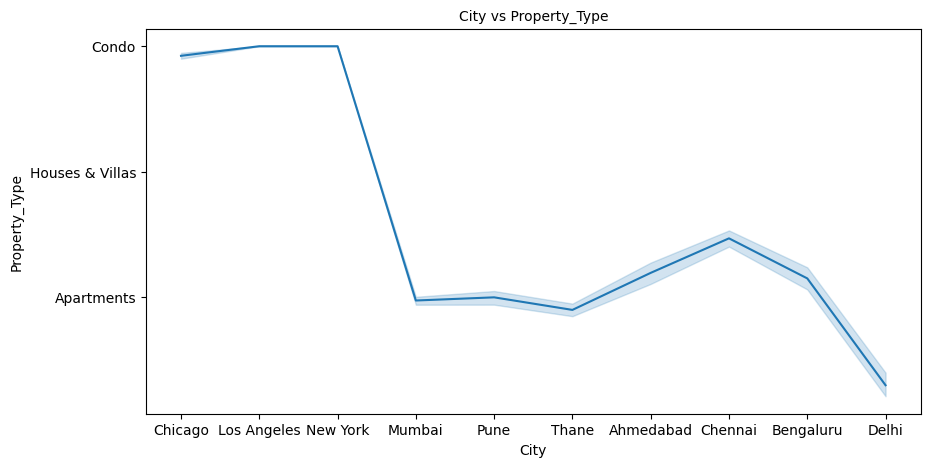

In [41]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='City', y='Property_Type')
locs, labels = plt.xticks()
plt.title('City vs Property_Type', fontsize=10)
plt.show()

Observation:- City and Property_Type is affecting to each other.

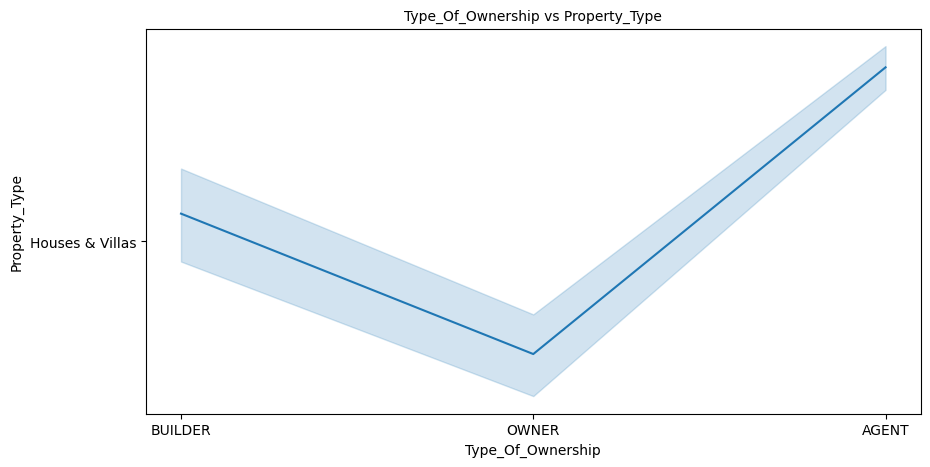

In [42]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Type_Of_Ownership', y='Property_Type')
locs, labels = plt.xticks()
plt.title('Type_Of_Ownership vs Property_Type', fontsize=10)
plt.show()

Observation:- Type_Of_Ownership and Property_Type is affecting to each other.

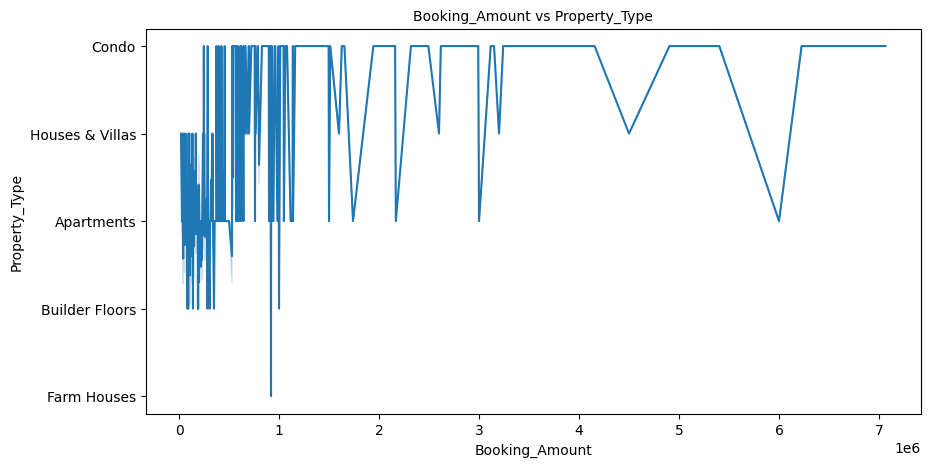

In [43]:
plt.figure(figsize = (10,5))
sns.lineplot (data = data,x='Booking_Amount', y='Property_Type')
locs, labels = plt.xticks()
plt.title('Booking_Amount vs Property_Type', fontsize=10)
plt.show()

Observation:- Booking_Amount and Property_Type is highly affecting to each other.

# Multivariate Analysis

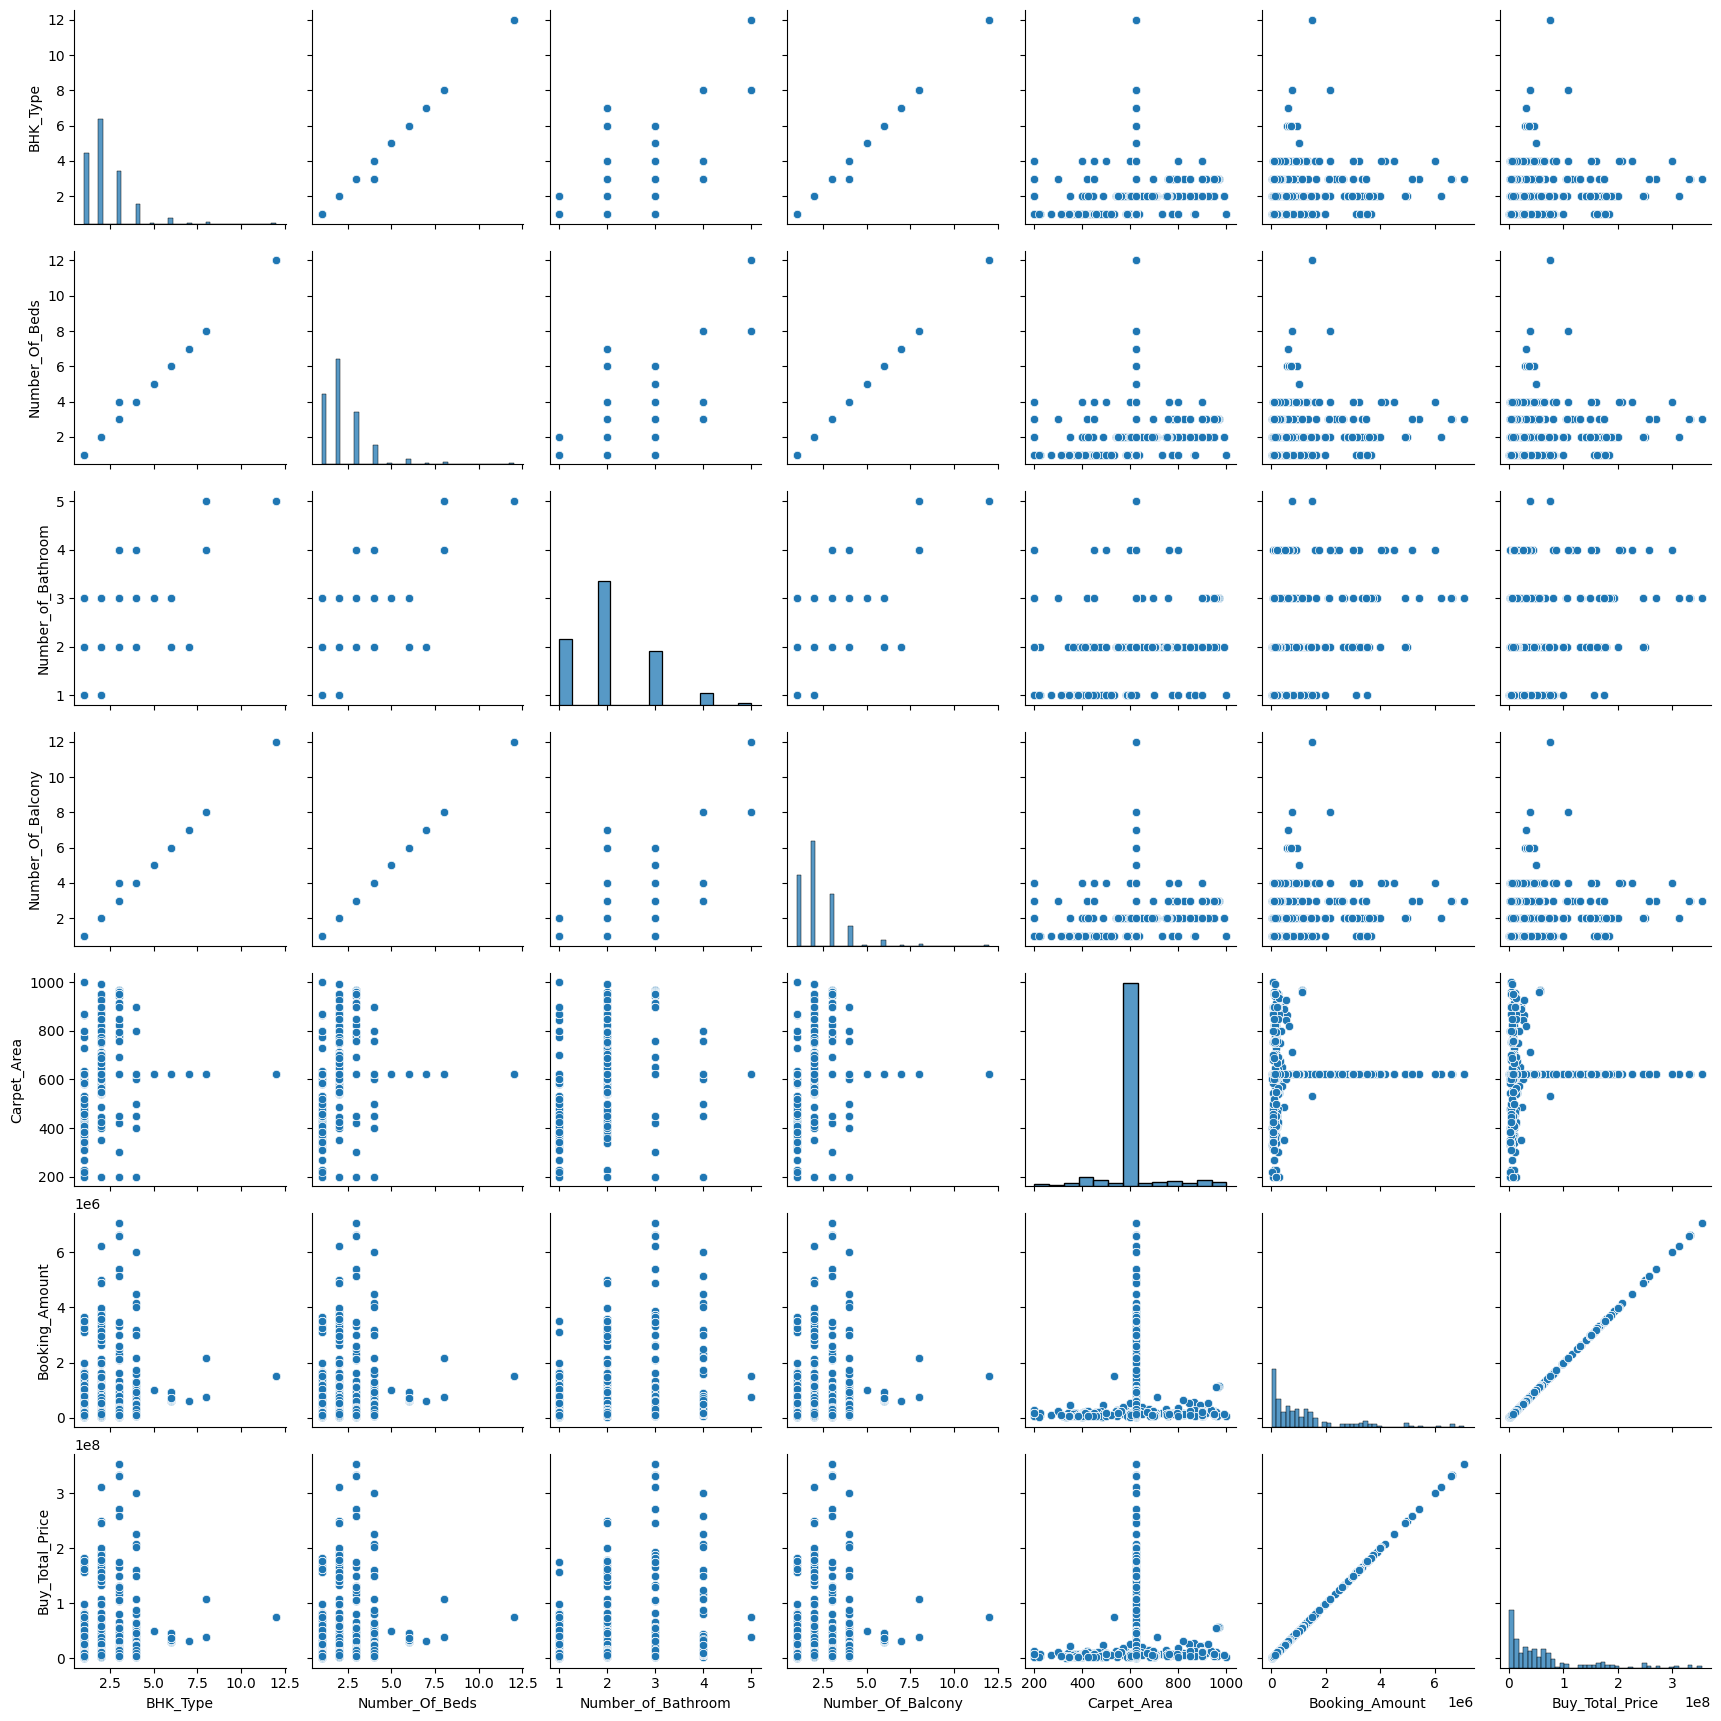

In [44]:
sns.pairplot(data)

# Encoding Target Column

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Property_Type']= le.fit_transform(data['Property_Type'])

In [46]:
data.head()

,BHK_Type,Property_Type,Number_Of_Beds,Number_of_Bathroom,Number_Of_Balcony,Address,City,Country,Carpet_Area,Status,Type_Of_Ownership,Booking_Amount,Buy_Total_Price
0,4,2,4,4,4,"305 South Racine Avenue #PHD, Chicago, IL 60607",Chicago,USA,622.480822,UNDER CONSTRUCTION,BUILDER,4155834,207791688
1,4,2,4,4,4,"305 South Racine Avenue #PHD, Chicago, IL 60607",Chicago,USA,622.480822,UNDER CONSTRUCTION,BUILDER,4031320,201566000
2,2,2,2,2,2,"630 North Franklin Street #803, Chicago, IL 60654",Chicago,USA,622.480822,UNDER CONSTRUCTION,BUILDER,789640,39482000
3,3,2,3,3,3,"340 East Randolph Street #1705, Chicago, IL 60601",Chicago,USA,622.480822,UNDER CONSTRUCTION,BUILDER,3316488,165824400
4,3,2,3,3,3,"1211 South Prairie Avenue #706, Chicago, IL 60605",Chicago,USA,622.480822,UNDER CONSTRUCTION,BUILDER,2078000,103900000


# Statistical Analysis

In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK_Type,3189.0,2.274694e+00,1.345489e+00,1.0,1.000000e+00,2.000000e+00,3.000000e+00,12.0
Property_Type,3189.0,1.632173e+00,1.188023e+00,0.0,0.000000e+00,2.000000e+00,2.000000e+00,4.0
Number_Of_Beds,3189.0,2.275949e+00,1.346631e+00,1.0,1.000000e+00,2.000000e+00,3.000000e+00,12.0
Number_of_Bathroom,3189.0,2.071182e+00,8.436124e-01,1.0,1.000000e+00,2.000000e+00,3.000000e+00,5.0
Number_Of_Balcony,3189.0,2.275949e+00,1.346631e+00,1.0,1.000000e+00,2.000000e+00,3.000000e+00,12.0
Carpet_Area,3189.0,6.224808e+02,1.037112e+02,200.0,6.224808e+02,6.224808e+02,6.224808e+02,1000.0
Booking_Amount,3189.0,1.230917e+06,1.430297e+06,20000.0,2.200000e+05,7.563920e+05,1.461250e+06,7065200.0
Buy_Total_Price,3189.0,6.154584e+07,7.151484e+07,1000000.0,1.100000e+07,3.781960e+07,7.306248e+07,353260000.0


# Correlation Between Dataset

In [48]:
numeric_data = data.select_dtypes(include=np.number)
data1 = numeric_data.corr()
data1

,BHK_Type,Property_Type,Number_Of_Beds,Number_of_Bathroom,Number_Of_Balcony,Carpet_Area,Booking_Amount,Buy_Total_Price
BHK_Type,1.000000,0.100711,0.999655,0.696579,0.999655,0.115555,0.020090,0.020090
Property_Type,0.100711,1.000000,0.100130,0.005163,0.100130,-0.007195,0.213891,0.213891
Number_Of_Beds,0.999655,0.100130,1.000000,0.698118,1.000000,0.116693,0.019369,0.019369
Number_of_Bathroom,0.696579,0.005163,0.698118,1.000000,0.698118,0.087636,0.232622,0.232622
Number_Of_Balcony,0.999655,0.100130,1.000000,0.698118,1.000000,0.116693,0.019369,0.019369
Carpet_Area,0.115555,-0.007195,0.116693,0.087636,0.116693,1.000000,0.016546,0.016546
Booking_Amount,0.020090,0.213891,0.019369,0.232622,0.019369,0.016546,1.000000,1.000000
Buy_Total_Price,0.020090,0.213891,0.019369,0.232622,0.019369,0.016546,1.000000,1.000000


<Axes: >

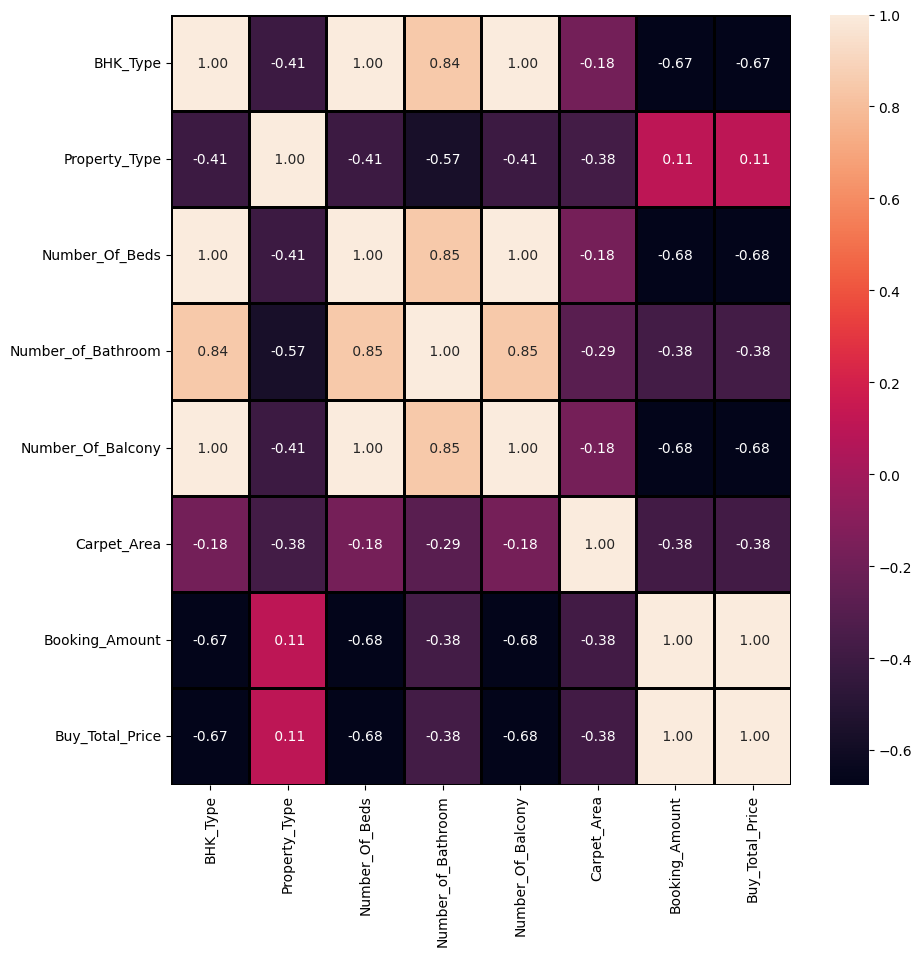

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot = True, linewidths =1, linecolor = 'black', fmt=' .2f')

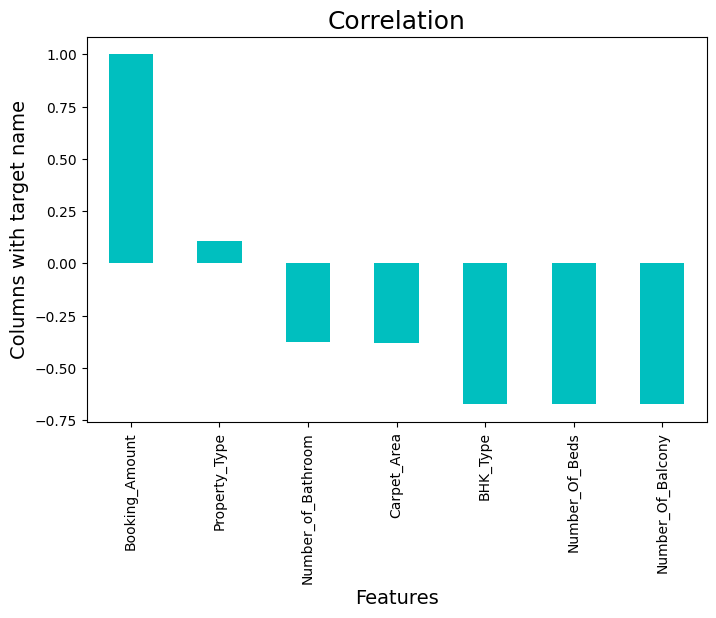

In [50]:
plt.figure(figsize=(8,5))
data1.corr()['Buy_Total_Price'].sort_values(ascending=False).drop(['Buy_Total_Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Columns with target name', fontsize =14)
plt.title('Correlation', fontsize=18)
plt.show()

Observation :- Here we can see that maximun no. of columns is negatively correlated with the Buy_Total_Price and rest are having strong positive correlation.

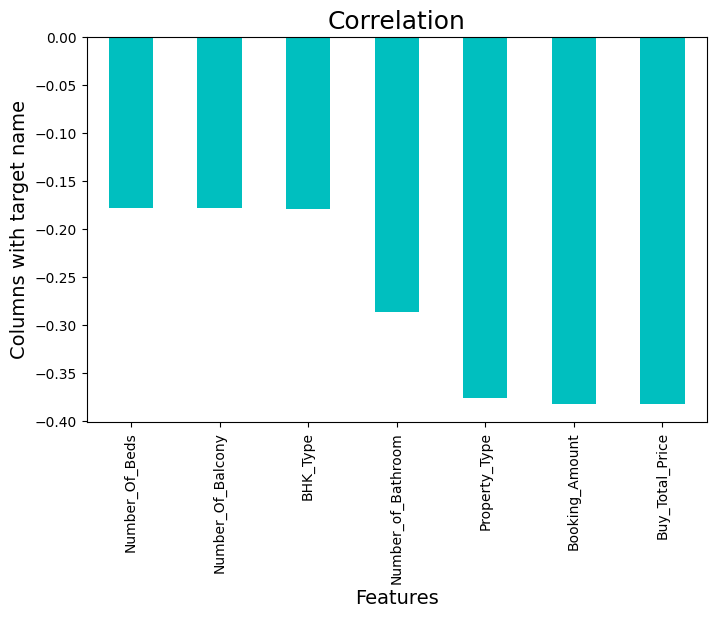

In [51]:
plt.figure(figsize=(8,5))
data1.corr()['Carpet_Area'].sort_values(ascending=False).drop(['Carpet_Area']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Columns with target name', fontsize =14)
plt.title('Correlation', fontsize=18)
plt.show()

Observation:- As per the data shows all columns are negatively correlated with  Carpet_Area.

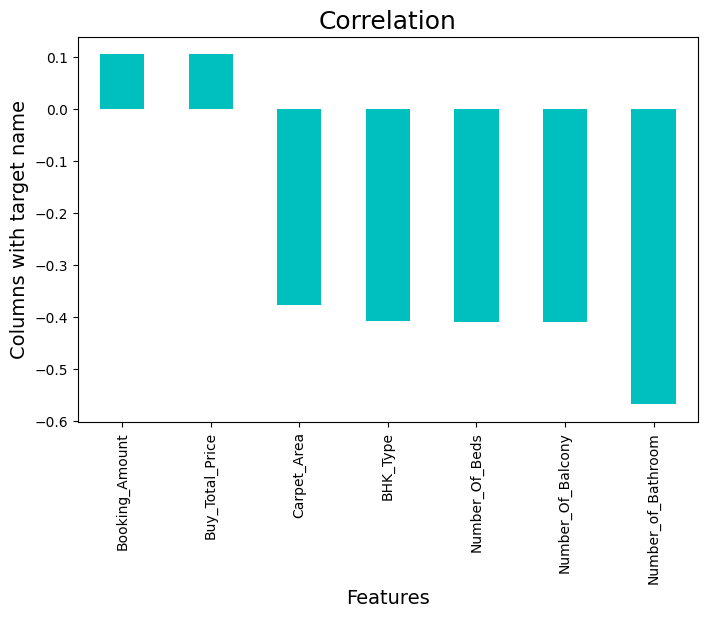

In [52]:
plt.figure(figsize=(8,5))
data1.corr()['Property_Type'].sort_values(ascending=False).drop(['Property_Type']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Columns with target name', fontsize =14)
plt.title('Correlation', fontsize=18)
plt.show()

Observation :- Here we can see that maximun no. of columns is negatively correlated with the Property_Type and rest are having strong positive correlation.

# Checking Outliers

<Axes: >

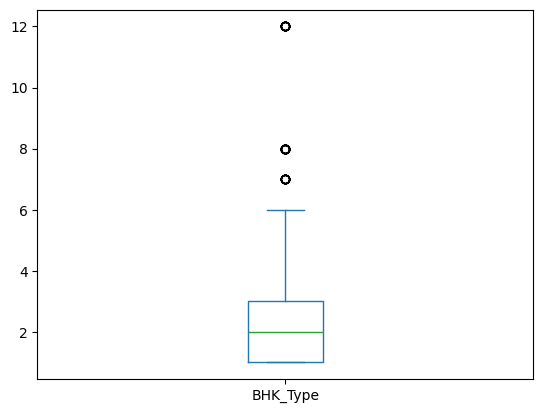

In [53]:
data['BHK_Type'].plot.box()

<Axes: >

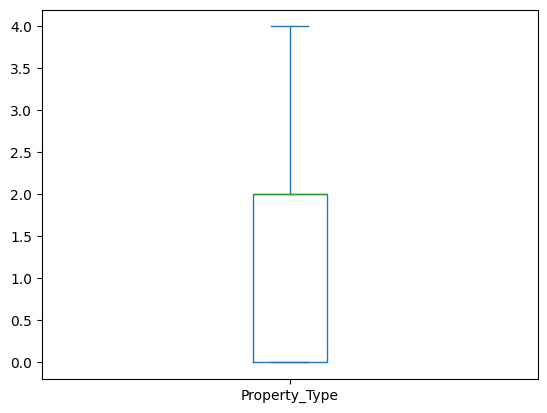

In [54]:
data['Property_Type'].plot.box()

<Axes: >

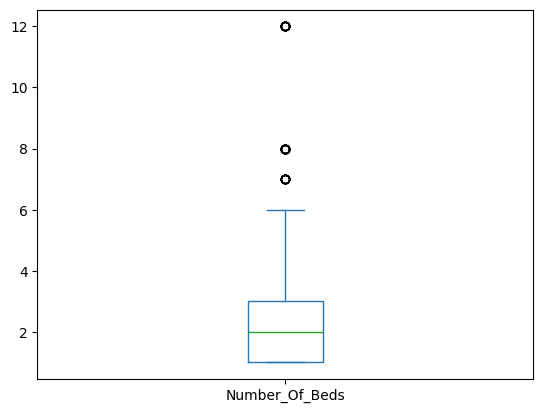

In [55]:
data['Number_Of_Beds'].plot.box()

<Axes: >

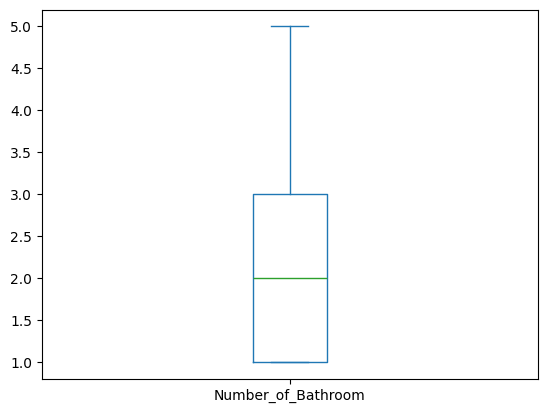

In [56]:
data['Number_of_Bathroom'].plot.box()

<Axes: >

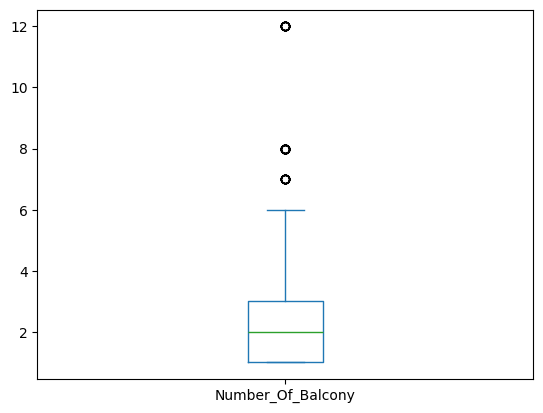

In [57]:
data['Number_Of_Balcony'].plot.box()

<Axes: >

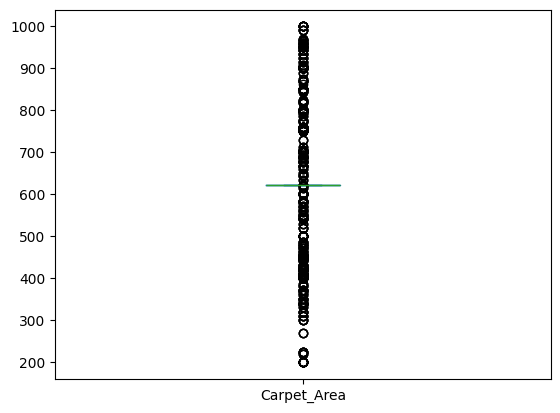

In [58]:
data['Carpet_Area'].plot.box()

<Axes: >

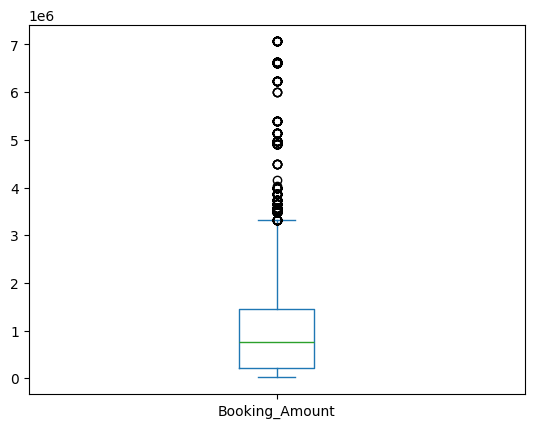

In [59]:
data['Booking_Amount'].plot.box()

<Axes: >

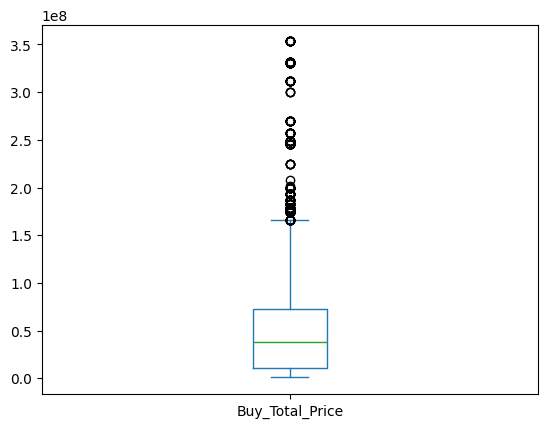

In [60]:
data['Buy_Total_Price'].plot.box()

Observation:- Here we can see boxplot indicates that we have outliers in dataset.

# Removing Outliers

In [61]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=np.number).columns

# Drop non-numeric columns or handle them appropriately
data = data.drop(columns=non_numeric_columns)  # or handle non-numeric values here

# Now apply z-score
from scipy.stats import zscore
z = np.abs(zscore(data))

In [62]:
df = data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(3189, 8)
(2972, 8)


In [63]:
Loss_percentage=(13298-12310)/13298*100
print(Loss_percentage)

7.42968867498872


Data loss is less than the 10 percent, we canproceed with new data.

In [64]:
df.shape

(2972, 8)

In [65]:
df.head()

,BHK_Type,Property_Type,Number_Of_Beds,Number_of_Bathroom,Number_Of_Balcony,Carpet_Area,Booking_Amount,Buy_Total_Price
0,4,2,4,4,4,622.480822,4155834,207791688
1,4,2,4,4,4,622.480822,4031320,201566000
2,2,2,2,2,2,622.480822,789640,39482000
3,3,2,3,3,3,622.480822,3316488,165824400
4,3,2,3,3,3,622.480822,2078000,103900000


# Checking Skewness

In [66]:
df.skew()

BHK_Type              1.215458
Property_Type         0.157383
Number_Of_Beds        1.212126
Number_of_Bathroom    0.490395
Number_Of_Balcony     1.212126
Carpet_Area           0.136687
Booking_Amount        1.595779
Buy_Total_Price       1.595779
dtype: float64

# Removing Skewness

In [67]:
# Columns with right-Skewed data containing zeros.
right_skewed = ['BHK_Type','Number_Of_Beds','Number_Of_Balcony','Booking_Amount','Buy_Total_Price']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

# transforming skew data
df[right_skewed] = scale.fit_transform(df[right_skewed].values)

In [68]:
# Filter out non-numeric columns
ndf = df.select_dtypes(exclude=['object','bool'])

# Compute skewness
skew_values = ndf.skew()
print(skew_values)

BHK_Type              0.035761
Property_Type         0.157383
Number_Of_Beds        0.036111
Number_of_Bathroom    0.490395
Number_Of_Balcony     0.036111
Carpet_Area           0.136687
Booking_Amount       -0.048301
Buy_Total_Price      -0.048302
dtype: float64


Observation:- Skewness remove from dataset

# Splitting Dataset

In [69]:
feature = ['BHK_Type', 'Property_Type', 'Number_Of_Beds', 'Number_of_Bathroom',
       'Number_Of_Balcony', 'Carpet_Area', 'Booking_Amount',
       ]
target1 = ['Buy_Total_Price']

In [70]:
x = df[feature]
y = df[target1]

# Feature Scalling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Variance_inflation_factor

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF,Features
0,2148.503635,BHK_Type
1,1.119172,Property_Type
2,inf,Number_Of_Beds
3,2.284753,Number_of_Bathroom
4,inf,Number_Of_Balcony
5,1.082208,Carpet_Area
6,1.155112,Booking_Amount


# Phase No - 4

# Model Building

# 1.Predict Buy_Total_Price

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 1.Linear Regression

In [74]:
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state = i, test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random State",i,"The model perform very well")
        print("At Random State",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Training r2_score",r2_score(y_test,pred_test)*100)

At Random State 0 The model perform very well
At Random State 0
Training r2_score 99.99999999994792
Training r2_score 99.9999999999192
At Random State 1 The model perform very well
At Random State 1
Training r2_score 99.99999999994704
Training r2_score 99.99999999992242
At Random State 2 The model perform very well
At Random State 2
Training r2_score 99.99999999994354
Training r2_score 99.9999999999303
At Random State 3 The model perform very well
At Random State 3
Training r2_score 99.99999999993605
Training r2_score 99.99999999994763
At Random State 4 The model perform very well
At Random State 4
Training r2_score 99.99999999994107
Training r2_score 99.99999999993608
At Random State 5 The model perform very well
At Random State 5
Training r2_score 99.99999999994499
Training r2_score 99.99999999992767
At Random State 6 The model perform very well
At Random State 6
Training r2_score 99.99999999994232
Training r2_score 99.99999999993335
At Random State 7 The model perform very well
At R

In [75]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 24)
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.9999999999991838


# Let's Check Model For Cross Validation

# Cross validation Of Model

In [76]:
test_accuracy = r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv = i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold{i} the  cross val score is {cv_mean*100} and accuracy score is {test_accuracy*100}")

At cross fold2 the  cross val score is 99.99999999989622 and accuracy score is 99.99999999991837
At cross fold3 the  cross val score is 99.99999999575545 and accuracy score is 99.99999999991837
At cross fold4 the  cross val score is 99.999999997697 and accuracy score is 99.99999999991837
At cross fold5 the  cross val score is 99.99999999948999 and accuracy score is 99.99999999991837
At cross fold6 the  cross val score is 99.9999999996586 and accuracy score is 99.99999999991837
At cross fold7 the  cross val score is 99.99999999972655 and accuracy score is 99.99999999991837
At cross fold8 the  cross val score is 99.99999999977172 and accuracy score is 99.99999999991837
At cross fold9 the  cross val score is 99.99999999982224 and accuracy score is 99.99999999991837


At cross fold2 the cross val score is 99.99999999988599 and accuracy score is 99.99999999993099

In [77]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 4.469344569263342e-07
Mean Squared Error: 8.193499124816075e-13
Root Mean Square Error: 9.051794918587184e-07


Observation :- This model Performing very well. But let's check more.

# 2. Lasso 

In [78]:
ls = Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred = ls.predict(x_test_b)

lsd =r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore =cross_val_score(ls,x,y,cv=8, scoring='r2')
lsc = rdscore.mean()
print('cross val score : ', lsc*100)

R2 score: -0.12906898214108953
cross val score :  -272.942553683935


In [79]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 0.8329564673121113
Mean Squared Error: 1.0051202260396928
Root Mean Square Error: 1.0025568442934758


Observation :- this model not performing Well.

# 3.Ridge

In [80]:
rd = Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred = rd.predict(x_test_b)

rds = r2_score(y_test_b, rd_pred)
print('r2_score: ', rds*100)

rdcvscore =  cross_val_score(rd,x,y,cv=8,scoring='r2')
rdcv = rdcvscore.mean()
print('cross val score', rdcv*100)

r2_score:  99.99997342736329
cross val score 99.99991220793873


In [81]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 0.00041921298744827443
Mean Squared Error: 2.6674266413036916e-07
Root Mean Square Error: 0.0005164713584801864


Observation :- This model Performing very well. But let's check more.

# 4.Decision Tree Regressor

In [82]:
dt = DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred = dt.predict(x_test_b)

dt_score = r2_score(y_test_b, dt_pred)
print('r2_score: ', dt_score*100)

dtcvscore =  cross_val_score(dt,x,y,cv=8,scoring='r2')
dtcv = dtcvscore.mean()
print('cross val score', dtcv*100)

r2_score:  99.99997796876458
cross val score 99.98302957808522


In [83]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 5.168842192735487e-05
Mean Squared Error: 2.2115496077788738e-07
Root Mean Square Error: 0.0004702711566510191


Observation :- This model Performing very well. But let's check more.

# 5.KNeighbors Regressor

In [84]:
kn = KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b, y_train_b)
kn_pred = kn.predict(x_test_b)

kn_score = r2_score(y_test_b, kn_pred)
print('r2_score: ', dt_score*100)

kncvscore =  cross_val_score(kn,x,y,cv=8,scoring='r2')
cv_mean = kncvscore.mean()
print('cross val score', cv_mean*100)

r2_score:  99.99997796876458
cross val score 86.32121098669505


In [85]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 0.037173125143053765
Mean Squared Error: 0.00951603845037352
Root Mean Square Error: 0.09755018426622022


Observation :- This model Performing very well. But let's check more.

# 6.Ensemble Techniques

In [86]:
rf = RandomForestRegressor()

rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
rf_pred = rf.predict(x_test_b)

rf_score = r2_score(y_test_b, rf_pred)
print('r2_score: ', rf_score*100)

rfcvscore =  cross_val_score(rf,x,y,cv=8,scoring='r2')
rfcvscore = rfcvscore.mean()
print('cross val score',rfcvscore*100)

r2_score:  99.99810813283567
cross val score 99.98782833046678


In [87]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.0005578680487891587
Mean Squared Error: 1.8991027992000775e-05
Root Mean Square Error: 0.004357869662117119


Observation:- In this model diffrence in the scores are very less as compare to other models, we can consider this as the best model. 

# Hyper Parameters Tunning

In [88]:
rf=RandomForestRegressor(criterion='friedman_mse', max_features='sqrt', min_samples_split=2, n_estimators=300)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)

R2 score: 99.9334085542124
Cross val Score : 98.25150540248163


Observation:- We can see that Random Forest Regressor having very less differnce in cross val score we can consider this our best model.

# Saving Model (Buy_Total_Price)

In [89]:
import pickle
filename = 'Buy_Total_Price.pkl'
pickle.dump(rf,open(filename,'wb'))

In [90]:
import pandas as pd
import numpy as np
# Assuming a and predicted are arrays or lists
a = np.array(y_test_b)
predicted = np.array(rf.predict(x_test_b))

a = a.flatten()
predicted = predicted.flatten()

# Create DataFrame
df_com = pd.DataFrame({'Original': a, 'Predicted': predicted})

# Display DataFrame
df_com

,Original,Predicted
0,0.598591,0.598591
1,-1.457049,-1.457090
2,0.114884,0.114884
3,0.492611,0.492611
4,-1.050322,-1.048939
...,...,...
887,1.036486,1.036486
888,-0.971129,-0.943441
889,-0.001970,-0.001970
890,0.492611,0.492611


# 2. Let's Predict Carpet_Area

In [91]:
df.head()

,BHK_Type,Property_Type,Number_Of_Beds,Number_of_Bathroom,Number_Of_Balcony,Carpet_Area,Booking_Amount,Buy_Total_Price
0,1.525441,2,1.522870,4,1.522870,622.480822,1.710008,1.710008
1,1.525441,2,1.522870,4,1.522870,622.480822,1.678191,1.678191
2,0.071927,2,0.071281,2,0.071281,622.480822,0.143789,0.143789
3,0.932003,2,0.930344,3,0.930344,622.480822,1.476987,1.476987
4,0.932003,2,0.930344,3,0.930344,622.480822,1.015230,1.015230


In [92]:
df.skew()

BHK_Type              0.035761
Property_Type         0.157383
Number_Of_Beds        0.036111
Number_of_Bathroom    0.490395
Number_Of_Balcony     0.036111
Carpet_Area           0.136687
Booking_Amount       -0.048301
Buy_Total_Price      -0.048302
dtype: float64

# Splitting Dataset

In [93]:
feature1 = ['BHK_Type', 'Property_Type', 'Number_Of_Beds', 'Number_of_Bathroom',
       'Number_Of_Balcony', 'Booking_Amount',
       'Buy_Total_Price']
target2 = ['Carpet_Area']

In [94]:
x = df[feature1]
y = df[target2]

In [95]:
x.skew()

BHK_Type              0.035761
Property_Type         0.157383
Number_Of_Beds        0.036111
Number_of_Bathroom    0.490395
Number_Of_Balcony     0.036111
Booking_Amount       -0.048301
Buy_Total_Price      -0.048302
dtype: float64

# Feature Scalling

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,BHK_Type,Property_Type,Number_Of_Beds,Number_of_Bathroom,Number_Of_Balcony,Booking_Amount,Buy_Total_Price
0,1.525441,0.320016,1.522870,2.511472,1.522870,1.710008,1.710008
1,1.525441,0.320016,1.522870,2.511472,1.522870,1.678191,1.678191
2,0.071927,0.320016,0.071281,-0.017015,0.071281,0.143789,0.143789
3,0.932003,0.320016,0.930344,1.247228,0.930344,1.476987,1.476987
4,0.932003,0.320016,0.930344,1.247228,0.930344,1.015230,1.015230
...,...,...,...,...,...,...,...
2967,0.071927,-0.532977,0.071281,-0.017015,0.071281,-0.852111,-0.852110
2968,0.932003,-0.532977,0.930344,-0.017015,0.930344,-1.485989,-1.485989
2969,0.071927,-0.532977,0.071281,-0.017015,0.071281,-0.852111,-0.852110
2970,1.525441,2.026000,1.522870,1.247228,1.522870,-1.415673,-1.415673


# Variance_inflation_factor

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF,Features
0,2.140196e+03,BHK_Type
1,1.190911e+00,Property_Type
2,inf,Number_Of_Beds
3,2.314374e+00,Number_of_Bathroom
4,inf,Number_Of_Balcony
5,1.637375e+12,Booking_Amount
6,1.637375e+12,Buy_Total_Price


# Model Building

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 1. Linear Regression

In [99]:
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state = i, test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random State",i,"The model perform very well")
        print("At Random State",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Training r2_score",r2_score(y_test,pred_test)*100)

At Random State 41 The model perform very well
At Random State 41
Training r2_score 8.606751656785994
Training r2_score 8.619446210892601
At Random State 95 The model perform very well
At Random State 95
Training r2_score 8.490600281783989
Training r2_score 8.543738695747704
At Random State 117 The model perform very well
At Random State 117
Training r2_score 8.628900836081044
Training r2_score 8.629243233898121
At Random State 269 The model perform very well
At Random State 269
Training r2_score 8.581560498089146
Training r2_score 8.618456064331603
At Random State 337 The model perform very well
At Random State 337
Training r2_score 8.605901542397987
Training r2_score 8.642798069549274
At Random State 423 The model perform very well
At Random State 423
Training r2_score 8.283708451629435
Training r2_score 8.284349381801492
At Random State 482 The model perform very well
At Random State 482
Training r2_score 8.591810278725776
Training r2_score 8.638195006956028
At Random State 608 The 

In [100]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 117)
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.0862924323389812


In [101]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 45.26861921276541
Mean Squared Error: 6578.411236795013
Root Mean Square Error: 81.10740556074404


obdervation:- Model is not performing well

# 2. Lasso

In [102]:
ls = Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred = ls.predict(x_test_b)

lsd =r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore =cross_val_score(ls,x,y,cv=8, scoring='r2')
lsc = rdscore.mean()
print('cross val score : ', lsc*100)

R2 score: 7.213887063081248
cross val score :  -1.1791915215760104e+30


In [103]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 44.41192614741952
Mean Squared Error: 6680.312493473924
Root Mean Square Error: 81.73317865759245


obdervation:- Model is not performing well

# 3. Ridge

In [104]:
rd = Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred = rd.predict(x_test_b)

rds = r2_score(y_test_b, rd_pred)
print('r2_score: ', rds*100)

rdcvscore =  cross_val_score(rd,x,y,cv=8,scoring='r2')
rdcv = rdcvscore.mean()
print('cross val score', rdcv*100)

r2_score:  7.3721765596704625
cross val score -1.3434338627989398e+30


In [105]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 45.47952500316965
Mean Squared Error: 6668.916140418704
Root Mean Square Error: 81.66343208816726


obdervation:- Model is not performing well

# 4. Decision Tree Regressor

In [106]:
dt = DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred = dt.predict(x_test_b)

dt_score = r2_score(y_test_b, dt_pred)
print('r2_score: ', dt_score*100)

dtcvscore =  cross_val_score(dt,x,y,cv=8,scoring='r2')
dtcv = dtcvscore.mean()
print('cross val score', dtcv*100)

r2_score:  92.30052449460324
cross val score -52074.0857661095


In [107]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 4.843013896081469
Mean Squared Error: 554.3383679286873
Root Mean Square Error: 23.544391432540515


obdervation:- Model is not performing well

# 5. KNeighbors Regressor

In [108]:
kn = KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b, y_train_b)
kn_pred = kn.predict(x_test_b)

kn_score = r2_score(y_test_b, kn_pred)
print('r2_score: ', dt_score*100)

kncvscore =  cross_val_score(kn,x,y,cv=8,scoring='r2')
cv_mean = kncvscore.mean()
print('cross val score', cv_mean*100)

r2_score:  92.30052449460324
cross val score 46.50661889908475


In [109]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 19.4945878125192
Mean Squared Error: 2387.703232912307
Root Mean Square Error: 48.86413033005199


Observation:- Model performing well

# 6. Ensemble Techniques

In [110]:
rf = RandomForestRegressor()

rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
rf_pred = rf.predict(x_test_b)

rf_score = r2_score(y_test_b, rf_pred)
print('r2_score: ', rf_score*100)

rfcvscore =  cross_val_score(rf,x,y,cv=8,scoring='r2')
rfcvscore = rfcvscore.mean()
print('cross val score',rfcvscore*100)

r2_score:  89.23207985784732
cross val score -5869.859100169169


In [111]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 8.996468310041621
Mean Squared Error: 775.2568695625414
Root Mean Square Error: 27.843434945468587


obdervation:- Model is not performing well

# 7. Gradient Boosting Regressor¶

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred = gb.predict(x_test_b)

gb_score = r2_score(y_test_b, gb_pred)
print('r2_score: ', gb_score*100)

gbcvscore =  cross_val_score(gb,x,y,cv=8,scoring='r2')
gbcvscore = gbcvscore.mean()
print('cross val score',gbcvscore*100)

r2_score:  63.36060768724463
cross val score -1.609133864979568e+28


In [113]:
print('Error:')

print('Mean Absolute Error:', mean_absolute_error(y_test_b, gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 25.449140090997695
Mean Squared Error: 2637.922663993863
Root Mean Square Error: 51.36071128784981


Observation:- KNeighbors Regressor is still the best model lets try hypertuning of the model.

# Hyper Parameters Tuning

In [114]:
kn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 score:', kn_score*100)

kncv=cross_val_score(kn,x,y, cv=8, scoring='r2')
kncvscore=kncv.mean()
print('Cross val Score :',kncvscore*100)

R2 score: 66.83602720003323
Cross val Score : 46.50661889908475


Observation:- We can see KNeighbors Regressor having very less differnce in cross val score we can consider this our best model.

# Saving model

In [115]:
import pickle
filename = 'Carpet_Area.pkl'
pickle.dump(kn,open(filename,'wb'))

In [116]:
import pandas as pd
import numpy as np
# Example data
# Replace with your actual test data and predictions
y_test_b = np.array([1, 2, 3, 4, 5])  # Example original values
predicted = np.array([1.1, 2.2, 2.9, 4.1, 5.3])  # Example predicted values

# Flatten arrays to ensure they are 1-dimensional
a = y_test_b.flatten()
predicted = predicted.flatten()

# Create DataFrame
df_com = pd.DataFrame({'original': a, 'predicted': predicted})

# Display DataFrame
df_com

,original,predicted
0,1,1.1
1,2,2.2
2,3,2.9
3,4,4.1
4,5,5.3


# 3. Let's Predict Property_Type

In [117]:
df.head()

,BHK_Type,Property_Type,Number_Of_Beds,Number_of_Bathroom,Number_Of_Balcony,Carpet_Area,Booking_Amount,Buy_Total_Price
0,1.525441,2,1.522870,4,1.522870,622.480822,1.710008,1.710008
1,1.525441,2,1.522870,4,1.522870,622.480822,1.678191,1.678191
2,0.071927,2,0.071281,2,0.071281,622.480822,0.143789,0.143789
3,0.932003,2,0.930344,3,0.930344,622.480822,1.476987,1.476987
4,0.932003,2,0.930344,3,0.930344,622.480822,1.015230,1.015230


In [118]:
df.skew()

BHK_Type              0.035761
Property_Type         0.157383
Number_Of_Beds        0.036111
Number_of_Bathroom    0.490395
Number_Of_Balcony     0.036111
Carpet_Area           0.136687
Booking_Amount       -0.048301
Buy_Total_Price      -0.048302
dtype: float64

# Splitting Dataset

In [119]:
feature2 = ['BHK_Type','Number_Of_Beds', 'Number_of_Bathroom',
       'Number_Of_Balcony', 'Carpet_Area', 'Booking_Amount',
       'Buy_Total_Price']
target3 = ['Property_Type']

In [120]:
x = df[feature2]
y = df[target3]

In [121]:
x.skew()

BHK_Type              0.035761
Number_Of_Beds        0.036111
Number_of_Bathroom    0.490395
Number_Of_Balcony     0.036111
Carpet_Area           0.136687
Booking_Amount       -0.048301
Buy_Total_Price      -0.048302
dtype: float64

# Feature Scalling

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Variance_inflation_factor

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF,Features
0,2.148587e+03,BHK_Type
1,inf,Number_Of_Beds
2,2.335423e+00,Number_of_Bathroom
3,inf,Number_Of_Balcony
4,1.094627e+00,Carpet_Area
5,1.556454e+12,Booking_Amount
6,1.556454e+12,Buy_Total_Price


# Model Building

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# 1.Logistic Regression

In [125]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state = i, test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State",i,"The model performing well")
        print("At Random State",i)
        print("Training Accuracy_Score is-",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy_Score is-",accuracy_score(y_test,pred_test)*100)

At Random State 61 The model performing well
At Random State 61
Training Accuracy_Score is- 80.31131678586453
Testing Accuracy_Score is- 80.33613445378151
At Random State 64 The model performing well
At Random State 64
Training Accuracy_Score is- 79.25957088767353
Testing Accuracy_Score is- 79.32773109243698
At Random State 141 The model performing well
At Random State 141
Training Accuracy_Score is- 79.76440891880522
Testing Accuracy_Score is- 79.83193277310924
At Random State 171 The model performing well
At Random State 171
Training Accuracy_Score is- 79.72233908287758
Testing Accuracy_Score is- 79.66386554621849
At Random State 192 The model performing well
At Random State 192
Training Accuracy_Score is- 79.76440891880522
Testing Accuracy_Score is- 79.83193277310924
At Random State 201 The model performing well
At Random State 201
Training Accuracy_Score is- 79.97475809844342
Testing Accuracy_Score is- 80.0
At Random State 233 The model performing well
At Random State 233
Training 

Observation:-  At Random State 61 The model performing well
At Random State 61

Training Accuracy_Score is- 80.31131678586453

Testing Accuracy_Score is- 80.33613445378151

In [126]:
x_train_b,x_test_b,y_train_b,y_test_b= train_test_split(x,y,random_state = 61, test_size=0.20)
lr.fit(x_train_b, y_train_b)
lr_pred = lr.predict(x_test_b)
print(accuracy_score(y_test_b, lr_pred))

0.8033613445378152


In [127]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[140   3  15   0   3]
 [ 31   1   1   0   1]
 [  8   0 336   0   3]
 [  3   0   2   0   0]
 [ 34   0  13   0   1]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74       161
           1       0.25      0.03      0.05        34
           2       0.92      0.97      0.94       347
           3       0.00      0.00      0.00         5
           4       0.12      0.02      0.04        48

    accuracy                           0.80       595
   macro avg       0.39      0.38      0.35       595
weighted avg       0.73      0.80      0.76       595



# Cross validation of model

In [128]:
lr_pred = lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score = accuracy_score(y_test_b, lr_pred)
for i in range(2,10):
    lr_cv = cross_val_score(lr,x,y,cv=i, scoring='accuracy')
    lr_cvscore =lr_cv.mean()
    print('at cv:-',i)
    print('cross validation score is:-', lr_cvscore*100)
    print('Accuracy Score:-', lr_score*100)
    print('\n')

at cv:- 2
cross validation score is:- 73.25033647375506
Accuracy Score:- 80.33613445378151


at cv:- 3
cross validation score is:- 75.57346081059502
Accuracy Score:- 80.33613445378151


at cv:- 4
cross validation score is:- 76.14401076716017
Accuracy Score:- 80.33613445378151


at cv:- 5
cross validation score is:- 77.42732648615002
Accuracy Score:- 80.33613445378151


at cv:- 6
cross validation score is:- 78.60500162919519
Accuracy Score:- 80.33613445378151


at cv:- 7
cross validation score is:- 78.87291897891232
Accuracy Score:- 80.33613445378151


at cv:- 8
cross validation score is:- 78.90808407964525
Accuracy Score:- 80.33613445378151


at cv:- 9
cross validation score is:- 79.17849186731361
Accuracy Score:- 80.33613445378151




Observation:- At cv:-9 Cross val score and accuracy score is having very less diffrence, model is perfoming well.

# 2.SVC

In [129]:
svc = SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred = svc.predict(x_test_b)

svc_d = accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv = cross_val_score(svc,x,y,cv=9, scoring='accuracy')
svc_score = svc_cv.mean()
print('Cross val Score:', svc_score*100)
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

Accuracy_core: 85.71428571428571
Cross val Score: 83.28104814509648
[[140   4   8   0   9]
 [ 21   7   1   0   5]
 [  1   0 346   0   0]
 [  0   2   2   0   1]
 [ 17   2  12   0  17]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       161
           1       0.47      0.21      0.29        34
           2       0.94      1.00      0.97       347
           3       0.00      0.00      0.00         5
           4       0.53      0.35      0.42        48

    accuracy                           0.86       595
   macro avg       0.54      0.49      0.50       595
weighted avg       0.83      0.86      0.84       595



Observation:- 
1. Accuracy_core: 85.71428571428571
2. Cross val Score: 83.28104814509648
3. Model Performing Well.

# Ensemble Techniques
# 3.KNeighbors Classifier

In [130]:
kn = KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b, y_train_b)
kn_pred = kn.predict(x_test_b)

kn_score = accuracy_score(y_test_b, kn_pred)
print('Accuracy_core:', kn_score*100)

kncvscore = cross_val_score(kn,x,y,cv=9, scoring='accuracy')
kncv_score = kncvscore.mean()
print('Cross val Score:', kncv_score*100)
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

Accuracy_core: 93.4453781512605
Cross val Score: 88.49868269807847
[[143   8   4   0   6]
 [  6  21   0   0   7]
 [  0   0 347   0   0]
 [  0   4   0   1   0]
 [  2   0   2   0  44]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       161
           1       0.64      0.62      0.63        34
           2       0.98      1.00      0.99       347
           3       1.00      0.20      0.33         5
           4       0.77      0.92      0.84        48

    accuracy                           0.93       595
   macro avg       0.87      0.72      0.74       595
weighted avg       0.94      0.93      0.93       595



Observation:-
1. Accuracy_core: 93.4453781512605
2. Cross val Score: 88.49868269807847
3. Model Performing Well.

# 4.Decision Tree Classifier

In [131]:
dt = DecisionTreeClassifier()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred = dt.predict(x_test_b)

dt_score = accuracy_score(y_test_b, dt_pred)
print('Accuracy_core:', dt_score*100)

dtcvscore = cross_val_score(dt,x,y,cv=9, scoring='accuracy')
dtcv_score = dtcvscore.mean()
print('Cross val Score:', dtcv_score*100)
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

Accuracy_core: 99.66386554621849
Cross val Score: 95.8997833318075
[[161   0   0   0   0]
 [  0  33   0   0   1]
 [  0   0 347   0   0]
 [  0   0   0   5   0]
 [  1   0   0   0  47]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       161
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00       347
           3       1.00      1.00      1.00         5
           4       0.98      0.98      0.98        48

    accuracy                           1.00       595
   macro avg       0.99      0.99      0.99       595
weighted avg       1.00      1.00      1.00       595



Observation:-

1. Accuracy_core: 99.66386554621849
2. Cross val Score: 95.83223982015522
3. Model Performing very Well.

# 5.Random Forest Classifier

In [132]:
rf = RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
rf_pred = rf.predict(x_test_b)

rf_score = accuracy_score(y_test_b, rf_pred)
print('Accuracy_core:', rf_score*100)

rfcvscore = cross_val_score(rf,x,y,cv=9, scoring='accuracy')
rfcv_score = rfcvscore.mean()
print('Cross val Score:', rfcv_score*100)
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

Accuracy_core: 99.66386554621849
Cross val Score: 96.16873671254336
[[160   0   0   0   1]
 [  0  33   0   0   1]
 [  0   0 347   0   0]
 [  0   0   0   5   0]
 [  0   0   0   0  48]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       161
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00       347
           3       1.00      1.00      1.00         5
           4       0.96      1.00      0.98        48

    accuracy                           1.00       595
   macro avg       0.99      0.99      0.99       595
weighted avg       1.00      1.00      1.00       595



Observation:-

1. Accuracy_core: 99.66386554621849
2. Cross val Score: 96.30300995859909
3. Model Performing very Good we can consider as best model.

# Hyperparameter tuning of the model

In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf=RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt', min_samples_split=5, n_estimators=1200)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=9, scoring='accuracy')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)

accuracy_score: 99.66386554621849
Cross val Score : 95.73133144130124


Observation:- We can see Random Forest Classifier having very less differnce in cross val score we can consider this our best model.

# Saving the Model

In [134]:
import pickle
filename = 'Property_Type.pkl'
pickle.dump(rf,open(filename,'wb'))

In [135]:
# Get predictions
predicted = rf.predict(x_test_b)

a = np.array(y_test_b).flatten()
predicted = predicted.flatten()

# Create DataFrame
df_com = pd.DataFrame({'original': a, 'predicted': predicted})

df_com

,original,predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,0,0
...,...,...
590,2,2
591,0,0
592,4,4
593,2,2
